In [1]:
# 之前的数据
import xarray as xr
import pandas as pd
ds = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test/preproc_ifs_radklim_2020-02.nc")
print(ds)


/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/yinzunyi/py3.9/lib/python3.9/site-packages/dask/array/chunk_types.py:131: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.3)
  import scipy.sparse


<xarray.Dataset>
Dimensions:        (time: 695, lat: 94, lon: 119, lat_tar: 931, lon_tar: 1181)
Coordinates:
  * time           (time) datetime64[ns] 2020-02-01T05:00:00 ... 2020-03-01T0...
  * lon            (lon) float32 4.3 4.4 4.5 4.6 4.7 ... 15.8 15.9 16.0 16.1
  * lat            (lat) float32 46.5 46.6 46.7 46.8 ... 55.5 55.6 55.7 55.8
  * lon_tar        (lon_tar) float64 4.3 4.31 4.32 4.33 ... 16.08 16.09 16.1
  * lat_tar        (lat_tar) float64 46.5 46.51 46.52 46.53 ... 55.78 55.79 55.8
Data variables:
    cape_in        (time, lat, lon) float64 ...
    tclw_in        (time, lat, lon) float64 ...
    sp_in          (time, lat, lon) float64 ...
    tcwv_in        (time, lat, lon) float64 ...
    lsp_in         (time, lat, lon) float64 ...
    cp_in          (time, lat, lon) float64 ...
    tisr_in        (time, lat, lon) float64 ...
    u700_in        (time, lat, lon) float64 ...
    v700_in        (time, lat, lon) float64 ...
    yw_hourly_in   (time, lat, lon) float64 ...
  

<xarray.DataArray 'time' (time: 695)>
array(['2020-02-01T05:00:00.000000000', '2020-02-01T06:00:00.000000000',
       '2020-02-01T07:00:00.000000000', ..., '2020-03-01T01:00:00.000000000',
       '2020-03-01T02:00:00.000000000', '2020-03-01T03:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01T05:00:00 ... 2020-03-01T03:00:00

In [7]:
import xarray as xr
import pandas as pd

# 读取数据
ds = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset/val/2017-01/preproc_ifs_radklim_2017-01.nc")

# 变量列表
vars_to_shift = ["cape_in", "tclw_in", "sp_in", "tcwv_in", "lsp_in", "cp_in", "tisr_in", "u700_in", "v700_in"]
vars_to_keep = ["yw_hourly_in", "yw_hourly_tar"]

# 重新获取第一个和最后一个时间点
first_time_point = ds.time.isel(time=0).values
last_time_point = ds.time.isel(time=-1).values

# 删除第一个小时的数据并平移时间
ds_shifted = ds.sel(time=slice(first_time_point, None)).drop_sel(time=first_time_point)
ds_shifted = ds_shifted.assign_coords(time=ds_shifted.time - pd.Timedelta(hours=1))

# 删除最后一个小时的数据
ds_trimmed = ds.sel(time=slice(None, last_time_point)).drop_sel(time=last_time_point)

# 合并处理后的数据集
ds_final = xr.merge([ds_shifted[vars_to_shift], ds_trimmed[vars_to_keep]])

# 保存
output_path = "/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/val/2017-01/preproc_ifs_radklim_2017-01.nc"
ds_final.to_netcdf(output_path)


In [1]:
import xarray as xr
import pandas as pd
# 修正后的数据
ds = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test/preproc_ifs_radklim_2020-02.nc")
ds

/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/yinzunyi/py3.9/lib/python3.9/site-packages/dask/array/chunk_types.py:131: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.3)
  import scipy.sparse


<xarray.Dataset>
Dimensions:        (time: 695, lat: 94, lon: 119, lat_tar: 931, lon_tar: 1181)
Coordinates:
  * time           (time) datetime64[ns] 2020-02-01T05:00:00 ... 2020-03-01T0...
  * lon            (lon) float32 4.3 4.4 4.5 4.6 4.7 ... 15.8 15.9 16.0 16.1
  * lat            (lat) float32 46.5 46.6 46.7 46.8 ... 55.5 55.6 55.7 55.8
  * lon_tar        (lon_tar) float64 4.3 4.31 4.32 4.33 ... 16.08 16.09 16.1
  * lat_tar        (lat_tar) float64 46.5 46.51 46.52 46.53 ... 55.78 55.79 55.8
Data variables:
    cape_in        (time, lat, lon) float64 ...
    tclw_in        (time, lat, lon) float64 ...
    sp_in          (time, lat, lon) float64 ...
    tcwv_in        (time, lat, lon) float64 ...
    lsp_in         (time, lat, lon) float64 ...
    cp_in          (time, lat, lon) float64 ...
    tisr_in        (time, lat, lon) float64 ...
    u700_in        (time, lat, lon) float64 ...
    v700_in        (time, lat, lon) float64 ...
    yw_hourly_in   (time, lat, lon) float64 ...
    yw_hourly_tar  (time, lat_tar, lon_tar) float64 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jul 13 15:44:16 2022: cdo merge /p/scratch/deepacf/deep...
    NCO:          netCDF Operators version 5.0.3 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

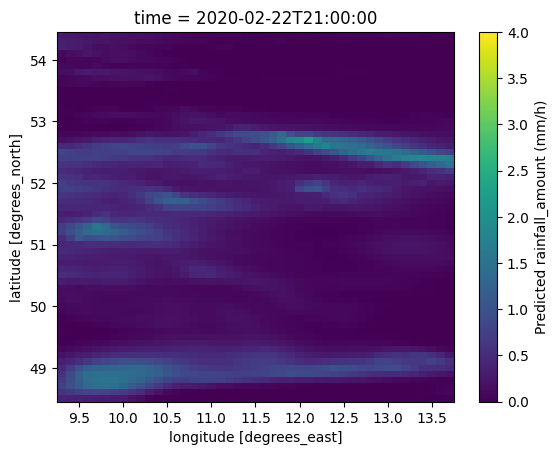

In [2]:
cp = ds["cp_in"].diff(dim="time") * 1000
lsp = ds["lsp_in"].diff(dim="time") *1000
ds = ds.assign(tp=cp+lsp)
ds['tp'].isel(time=520, lat=slice(20, 80), lon=slice(50, 95)).plot(vmin=0, vmax=4, add_colorbar=True, cbar_kwargs={'label': 'Predicted rainfall_amount (mm/h)'})

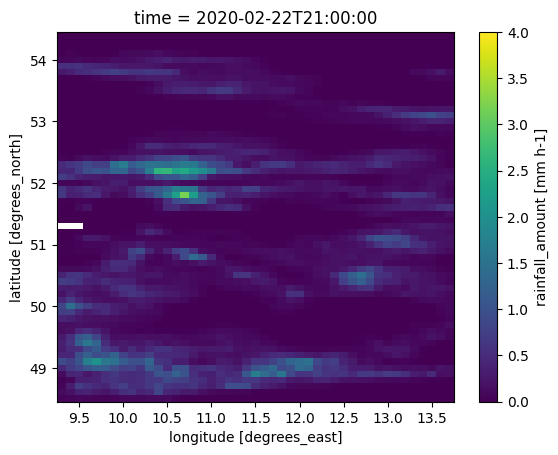

In [5]:
ds["yw_hourly_in"].isel(time=520, lat=slice(20, 80), lon=slice(50, 95)).plot(vmin=0, vmax=4)

In [19]:
ds['total_precip'].isel(lon = slice(2, 114)).sel(lat = slice(47.5, 60))

<xarray.DataArray 'total_precip' (time: 695, lat: 84, lon: 112)>
array([[[ 1.47685417e-03,  1.47685417e-03,  1.47685417e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
        [ 7.38427085e-03,  7.38427085e-03,  7.38427085e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
        [ 7.38427085e-03,  7.38427085e-03,  7.38427085e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
        ...,
        [ 9.03388745e-02,  3.04966981e-01,  2.21814695e-01, ...,
          2.71363685e+00,  2.79627939e+00,  3.03808374e+00],
        [ 1.40821896e-01,  5.48266176e-02,  5.64791505e-02, ...,
          2.77836871e+00,  2.76332740e+00,  2.85314465e+00],
        [ 4.03673473e-02,  1.49973083e-01,  8.22428252e-01, ...,
          2.02842174e+00,  2.16079604e+00,  2.41204898e+00]],

       [[ 2.48430027e-03,  1.47685417e-03,  1.47685417e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
        [ 1.10782399e-02,  7.38427085e-03,  7.38427085e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
        [ 2.09925643e-02,  8.86112502e-03,  7.87655557e-03, ...,
         -6.54332952e-16, -6.54332952e-16, -6.54332952e-16],
...
        [ 6.92744957e+00,  7.01313069e+00,  6.63137489e+00, ...,
          2.31800959e+00,  2.33665389e+00,  2.31710286e+00],
        [ 7.16309269e+00,  6.95586147e+00,  6.83593137e+00, ...,
          2.28964275e+00,  2.22100465e+00,  2.15838858e+00],
        [ 7.23623613e+00,  7.21610947e+00,  7.36343419e+00, ...,
          2.38234351e+00,  2.27046028e+00,  2.13872531e+00]],

       [[ 4.52548418e+00,  5.30533142e+00,  5.31335772e+00, ...,
          1.15401563e-01,  1.16039141e-01,  1.25602806e-01],
        [ 5.28156423e+00,  5.53436418e+00,  5.12089256e+00, ...,
          2.00199397e-01,  2.11675795e-01,  2.27615237e-01],
        [ 6.49938138e+00,  5.92359869e+00,  5.91206060e+00, ...,
          3.36003446e-01,  3.38553757e-01,  3.85096928e-01],
        ...,
        [ 7.00102510e+00,  7.19434015e+00,  6.91045763e+00, ...,
          2.35166984e+00,  2.35752447e+00,  2.33072709e+00],
        [ 7.45970999e+00,  7.28103631e+00,  7.13887154e+00, ...,
          2.32878698e+00,  2.25455685e+00,  2.17935870e+00],
        [ 7.68001090e+00,  7.78190716e+00,  7.89191996e+00, ...,
          2.39678959e+00,  2.27675132e+00,  2.14128832e+00]]])
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01T05:00:00 ... 2020-03-01T03:00:00
  * lon      (lon) float32 4.5 4.6 4.7 4.8 4.9 5.0 ... 15.2 15.3 15.4 15.5 15.6
  * lat      (lat) float32 47.5 47.6 47.7 47.8 47.9 ... 55.4 55.5 55.6 55.7 55.8

In [20]:
ds["yw_hourly_in"].isel(lon = slice(2, 114)).sel(lat = slice(47.5, 60))

<xarray.DataArray 'yw_hourly_in' (time: 695, lat: 84, lon: 112)>
[6538560 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01T05:00:00 ... 2020-03-01T03:00:00
  * lon      (lon) float32 4.5 4.6 4.7 4.8 4.9 5.0 ... 15.2 15.3 15.4 15.5 15.6
  * lat      (lat) float32 47.5 47.6 47.7 47.8 47.9 ... 55.4 55.5 55.6 55.7 55.8
Attributes:
    standard_name:  rainfall_amount
    long_name:      rainfall_amount
    version:        2.18.3
    unit:           mm h-1
    vtype:          u2

In [97]:
import xarray as xr
import pandas as pd

df = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/topography_srtm_ifs2radklim.nc")
print(df)

<xarray.Dataset>
Dimensions:            (lon_tar: 1181, lat_tar: 931)
Coordinates:
  * lon_tar            (lon_tar) float64 4.3 4.31 4.32 4.33 ... 16.08 16.09 16.1
  * lat_tar            (lat_tar) float64 46.5 46.51 46.52 ... 55.78 55.79 55.8
Data variables:
    surface_elevation  (lon_tar, lat_tar) float32 ...
Attributes: (12/17)
    CDI:                Climate Data Interface version 2.0.2 (https://mpimet....
    Conventions:        CF-1.6
    citation:           Jarvis, A., H.I. Reuter, A. Nelson, E. Guevara, 2008,...
    data_description:   The Shuttle Radar Topography Mission (SRTM) was flown...
    data_source:        NASA Shuttle Radar Topographic Mission (SRTM)
    data_url:           http://srtm.csi.cgiar.org/SELECTION/inputCoord.asp
    ...                 ...
    units:              m
    upload_date:        2021-09-16
    version:            4
    NCO:                netCDF Operators version 5.0.3 (Homepage = http://nco...
    history:            Wed Oct 19 15:28:53 2022: cd

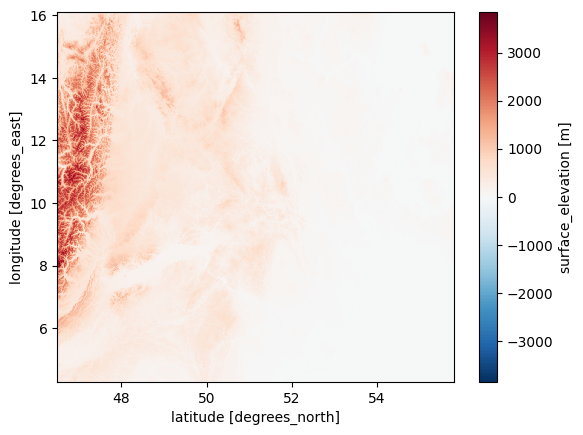

In [102]:
df["surface_elevation"].plot()

In [18]:
import torch
import torchvision

if torch.cuda.is_available():
    print("CUDA is available. You can use GPU!")
    print("CUDA version:", torch.version.cuda)
else:
    print("CUDA is not available. GPU cannot be used.")

CUDA is not available. GPU cannot be used.


In [20]:
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


In [21]:
print(torch.__version__)
print(torchvision.__version__)

2.4.0+cu121
0.19.0+cu121


In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113 -i https://pypi.tuna.tsinghua.edu.cn/simple 

In [5]:
import xarray as xr
import pandas as pd

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_small_output/prcp_downs_unet_year_2020.nc")
dn

<xarray.Dataset>
Dimensions:    (time: 48, lat_in: 16, lon_in: 16, lat: 160, lon: 160,
                pitch_idx: 48)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01T08:00:00 ... 2020-03-02T09:00:00
  * pitch_idx  (pitch_idx) int32 1 2 3 4 5 6 7 8 9 ... 41 42 43 44 45 46 47 48
Dimensions without coordinates: lat_in, lon_in, lat, lon
Data variables:
    inputs     (time, lat_in, lon_in) float32 ...
    fcst       (time, lat_in, lon_in) float32 ...
    hr         (time, lat_in, lon_in) float32 ...
    hr_orig    (time, lat, lon) float32 ...
    lats       (time, lat) float32 ...
    lons       (time, lon) float32 ...
    tops       (time, lat, lon) float32 ...
Attributes:
    description:  Precipitation downscaling data.

In [6]:
import xarray as xr
import pandas as pd

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output/prcp_downs_unet_year_2020.nc")
dn

<xarray.Dataset>
Dimensions:    (time: 7272, lat_in: 16, lon_in: 16, lat: 160, lon: 160,
                pitch_idx: 7272)
Coordinates:
  * time       (time) datetime64[ns] 2020-02-01T06:00:00 ... 2020-12-01T02:00:00
  * pitch_idx  (pitch_idx) int32 1 2 3 4 5 6 7 ... 7267 7268 7269 7270 7271 7272
Dimensions without coordinates: lat_in, lon_in, lat, lon
Data variables:
    inputs     (time, lat_in, lon_in) float32 ...
    fcst       (time, lat_in, lon_in) float32 ...
    hr         (time, lat_in, lon_in) float32 ...
    hr_orig    (time, lat, lon) float32 ...
    lats       (time, lat) float32 ...
    lons       (time, lon) float32 ...
    tops       (time, lat, lon) float32 ...
Attributes:
    description:  Precipitation downscaling data.

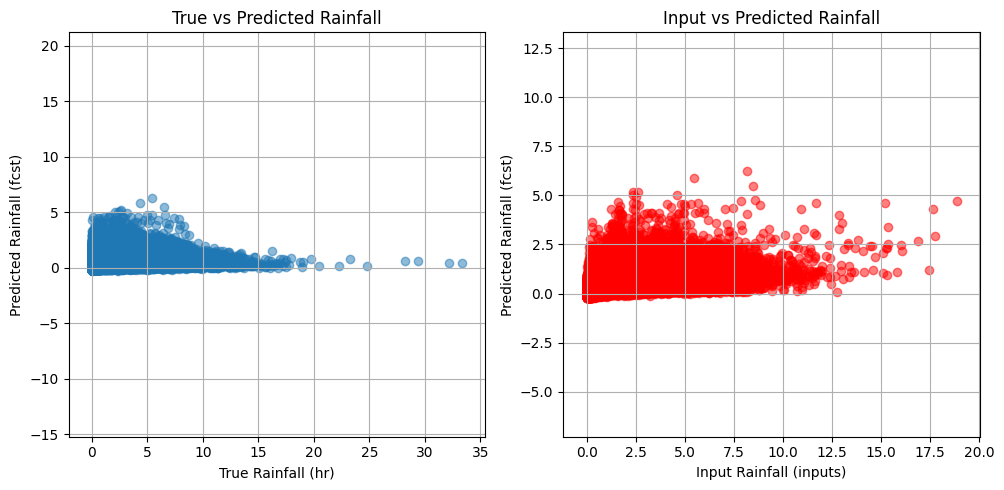

Correlation coefficient between HR and FCST: 0.45


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 绘制预测值与真实值的散点图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.axis('equal')
plt.xlim([dn['hr'].min(), dn['hr'].max()])
plt.ylim([dn['fcst'].min(), dn['fcst'].max()])

# 绘制输入与预测值的散点图
plt.subplot(1, 2, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.axis('equal')
plt.xlim([dn['inputs'].min(), dn['inputs'].max()])
plt.ylim([dn['fcst'].min(), dn['fcst'].max()])

plt.tight_layout()
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

<xarray.DataArray 'fcst' ()>
array(-0.24376327, dtype=float32)
<xarray.DataArray 'fcst' ()>
array(6.2564807, dtype=float32)


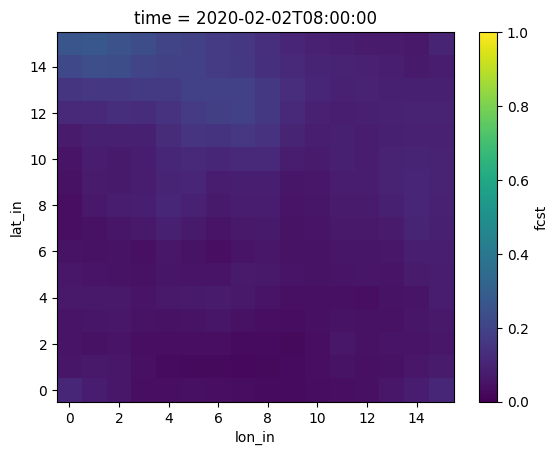

In [12]:
dn["fcst"].isel(time=100).plot(vmin=0,vmax=1)
print(dn["fcst"].min())
print(dn["fcst"].max())

<xarray.DataArray 'inputs' ()>
array(0., dtype=float32)
<xarray.DataArray 'inputs' ()>
array(18.84154, dtype=float32)


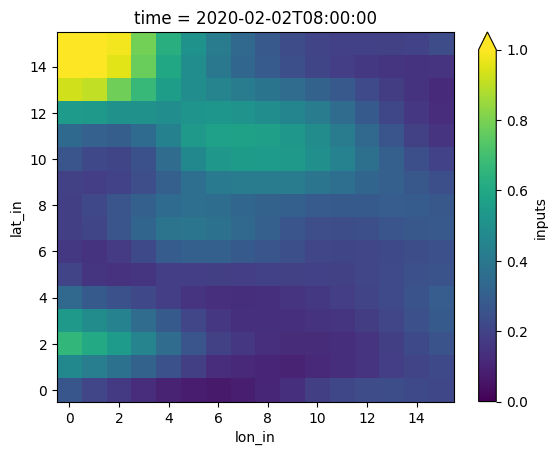

In [13]:
dn["inputs"].isel(time=100).plot(vmin=0,vmax=1)
print(dn["inputs"].min())
print(dn["inputs"].max())

<xarray.DataArray 'hr' ()>
array(0., dtype=float32)
<xarray.DataArray 'hr' ()>
array(33.34996, dtype=float32)


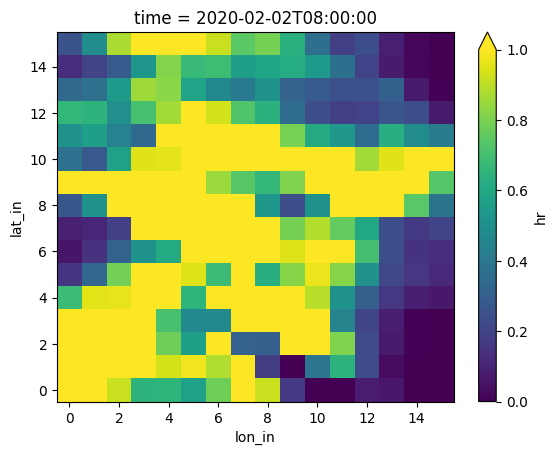

In [14]:
dn["hr"].isel(time=100).plot(vmin=0,vmax=1)
print(dn["hr"].min())
print(dn["hr"].max())

<xarray.DataArray 'hr_orig' ()>
array(0., dtype=float32)
<xarray.DataArray 'hr_orig' ()>
array(52.822174, dtype=float32)


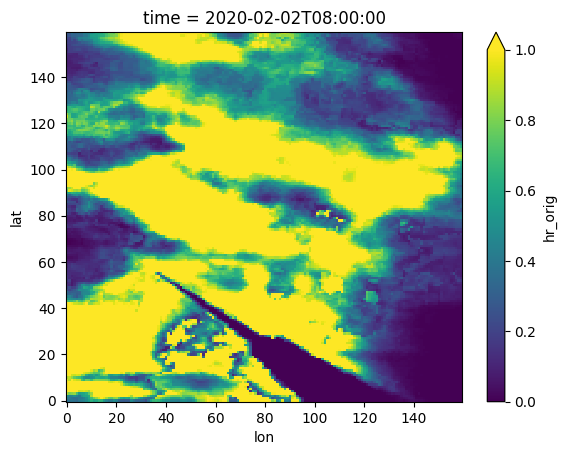

In [15]:
dn["hr_orig"].isel(time=100).plot(vmin=0,vmax=1)
print(dn["hr_orig"].min())
print(dn["hr_orig"].max())

In [3]:
import xarray as xr
import pandas as pd

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm/prcp_downs_unet_year_2020.nc")
dm

<xarray.Dataset>
Dimensions:    (time: 7272, lat_in: 16, lon_in: 16, lat: 160, lon: 160,
                pitch_idx: 7272)
Coordinates:
  * time       (time) datetime64[ns] 2020-02-01T06:00:00 ... 2020-12-01T02:00:00
  * pitch_idx  (pitch_idx) int32 1 2 3 4 5 6 7 ... 7267 7268 7269 7270 7271 7272
Dimensions without coordinates: lat_in, lon_in, lat, lon
Data variables:
    inputs     (time, lat_in, lon_in) float32 ...
    fcst       (time, lat_in, lon_in) float32 ...
    hr         (time, lat_in, lon_in) float32 ...
    hr_orig    (time, lat, lon) float32 ...
    lats       (time, lat) float32 ...
    lons       (time, lon) float32 ...
    tops       (time, lat, lon) float32 ...
Attributes:
    description:  Precipitation downscaling data.

<xarray.DataArray 'fcst' ()>
array(-0.16434433, dtype=float32)
<xarray.DataArray 'fcst' ()>
array(0.6400761, dtype=float32)


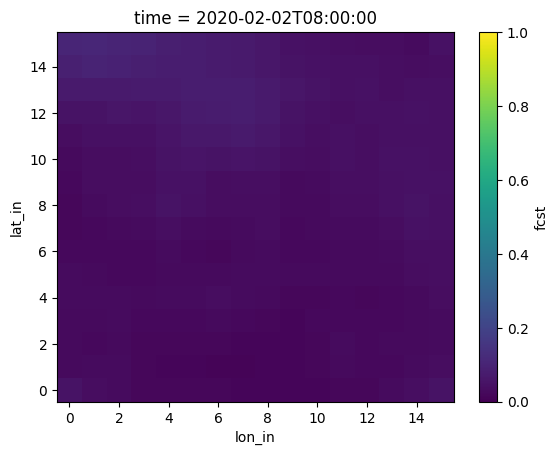

In [4]:
dm["fcst"].isel(time=100).plot(vmin=0,vmax=1)
print(dm["fcst"].min())
print(dm["fcst"].max())

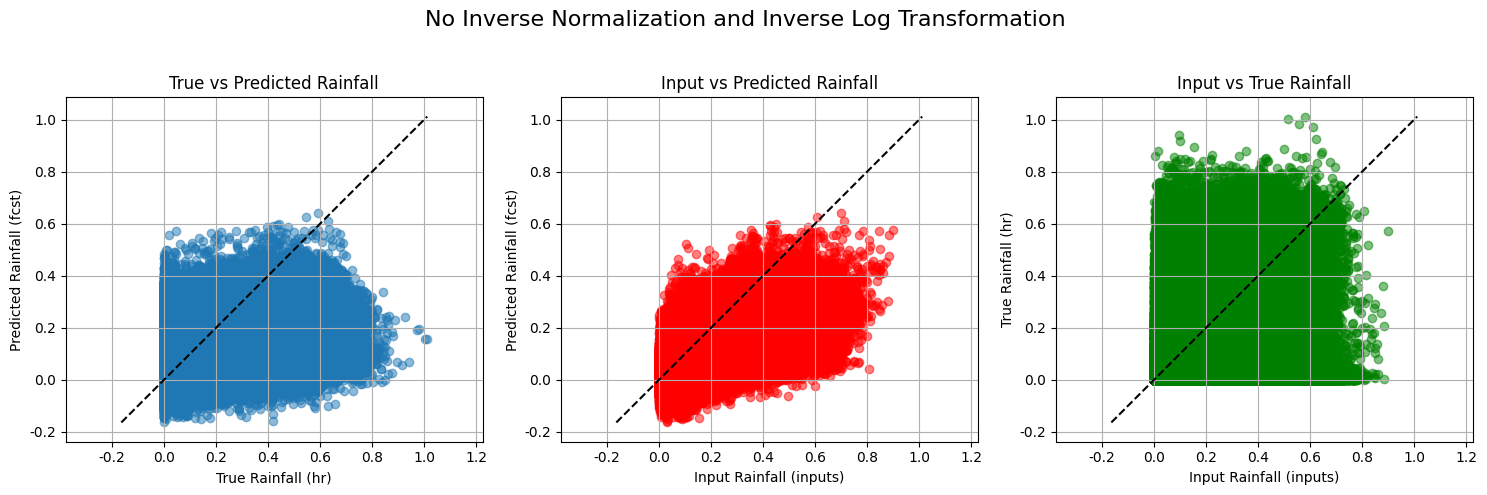

Correlation coefficient between HR and FCST: 0.49


In [15]:
"""
20轮的推理nc结果（没有进行反对数变换以及反归一化，
去除了这部分看看反对数变换以及反归一化是不是出错了而导致预测的结果不太好，
验错的方法就是控制有和没有这个步骤，对比数据的分布）
"""
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 3, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 3, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.suptitle('No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

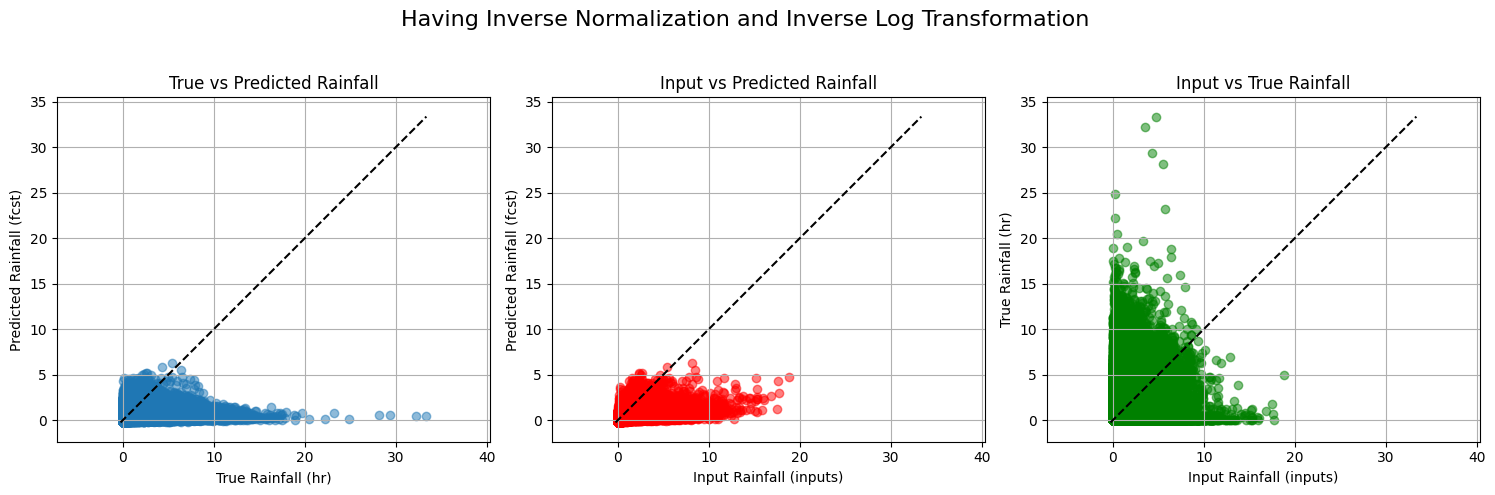

Correlation coefficient between HR and FCST: 0.45


In [16]:
# 20轮的推理nc结果（正确的有进行反对数变换以及反归一化）
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np


# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 3, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 3, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.suptitle('Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

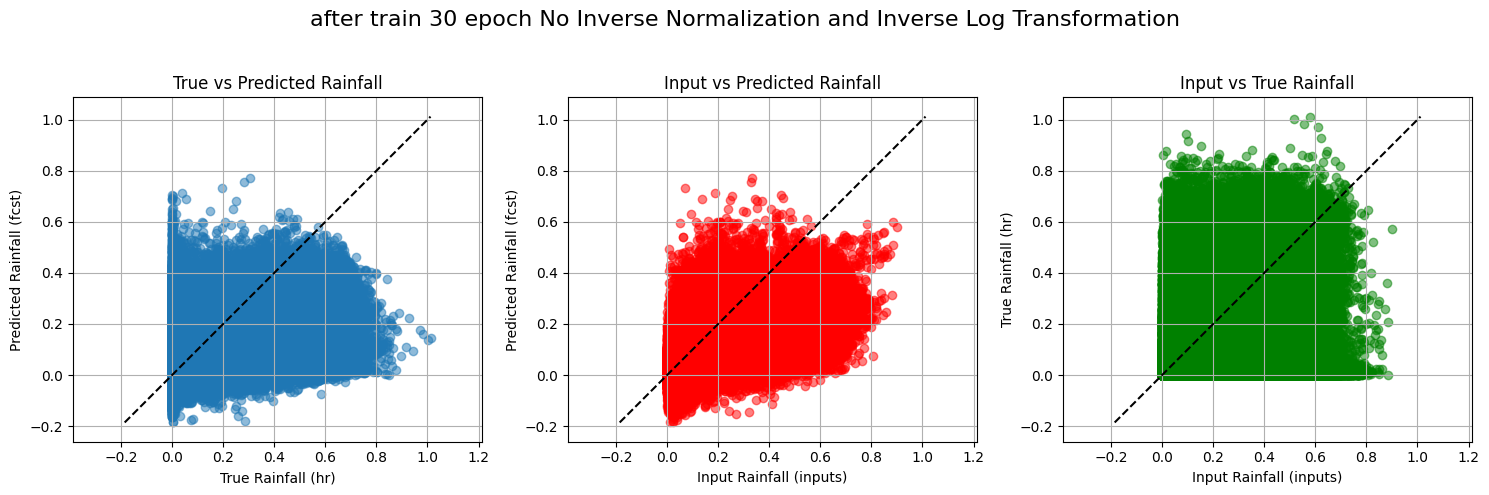

<xarray.DataArray 'fcst' ()>
array(-0.1854977, dtype=float32)
<xarray.DataArray 'fcst' ()>
array(0.7712633, dtype=float32)
<xarray.DataArray 'inputs' ()>
array(0., dtype=float32)
<xarray.DataArray 'inputs' ()>
array(0.89863694, dtype=float32)
Correlation coefficient between HR and FCST: 0.50


In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm30epoch/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 3, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 3, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.suptitle('after train 30 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(dm["fcst"].min())
print(dm["fcst"].max())
print(dm["inputs"].min())
print(dm["inputs"].max())
print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

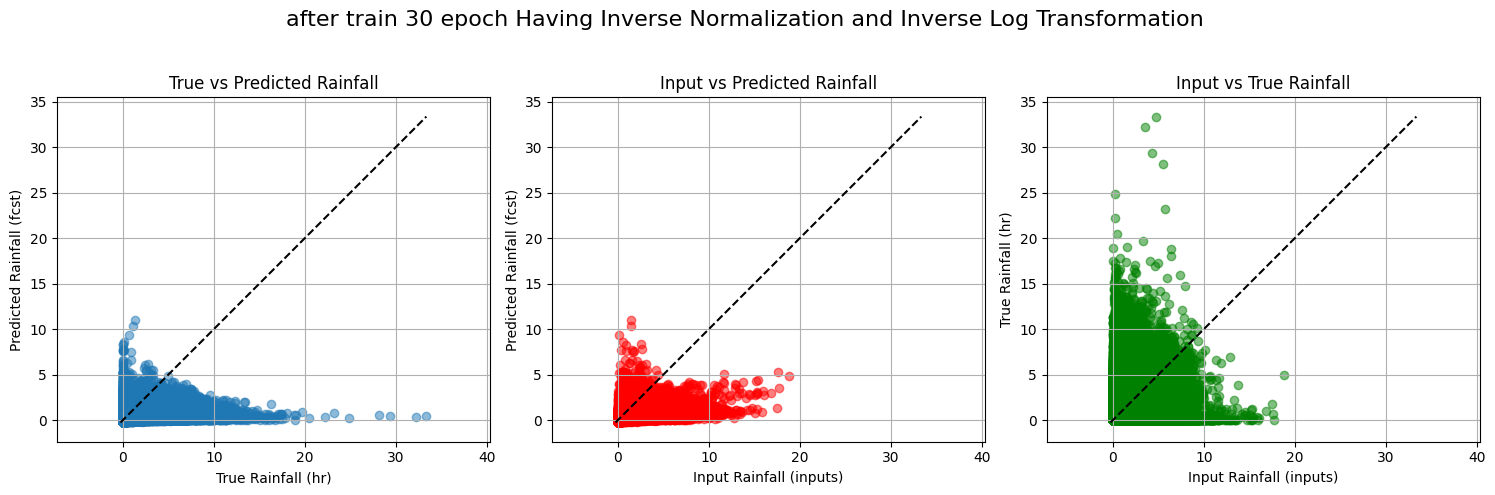

Correlation coefficient between HR and FCST: 0.46


In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_30epoch/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 3, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 3, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.suptitle('after train 30 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(dn["fcst"].min())
print(dn["fcst"].max())
print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

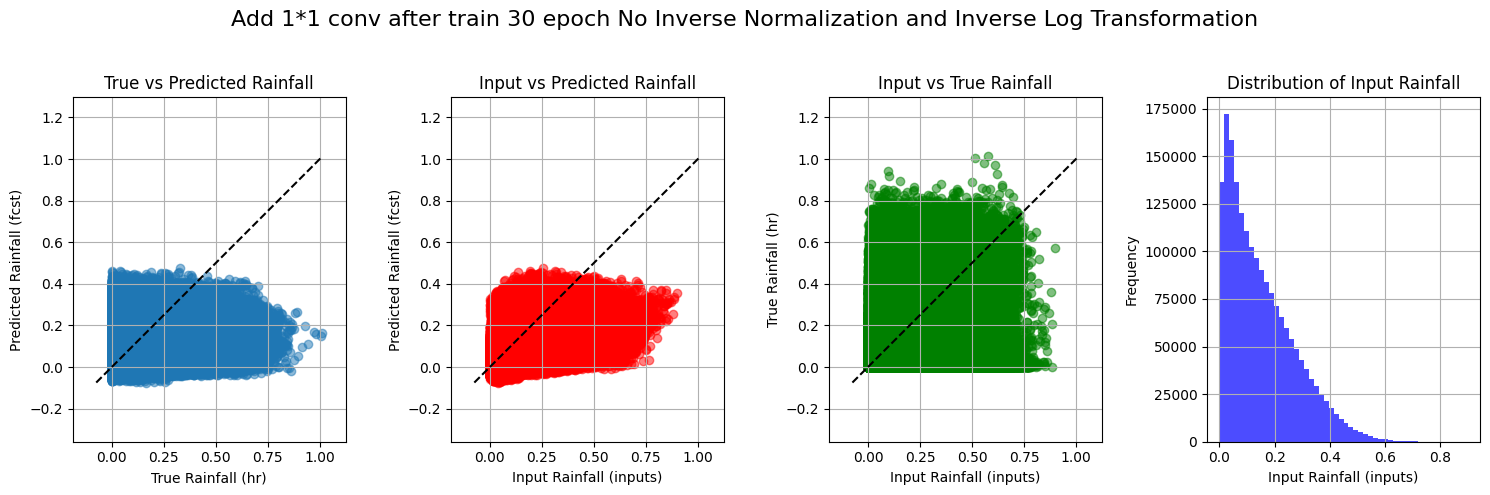

Correlation coefficient between HR and FCST: 0.42


In [7]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm30epoch_add_1*1conv/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Add 1*1 conv after train 30 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

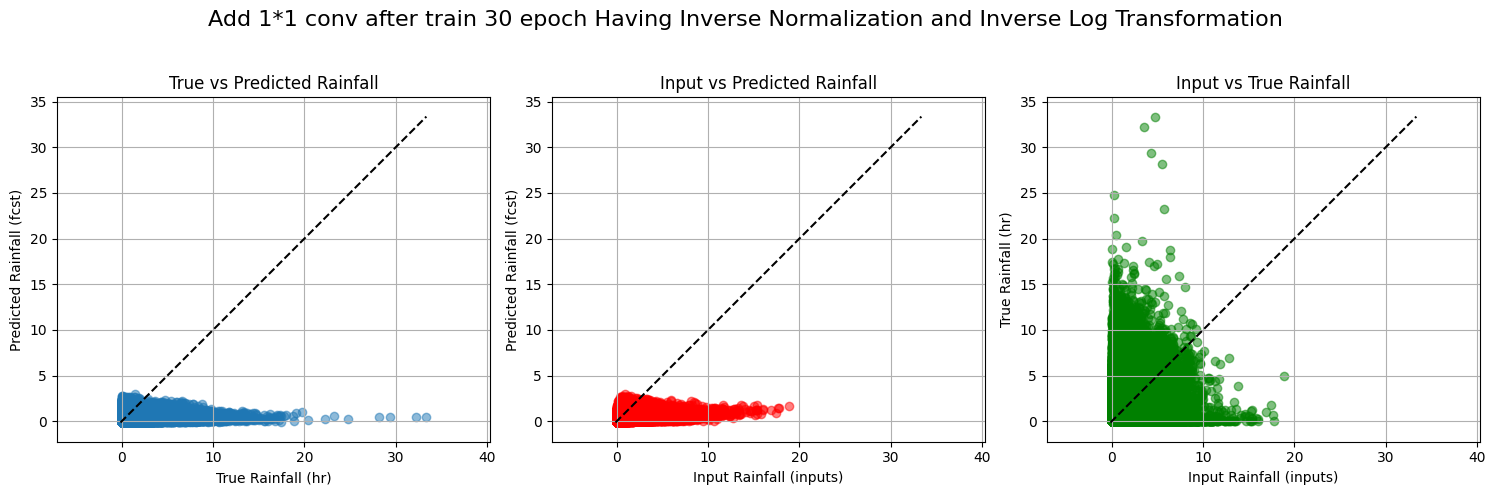

Correlation coefficient between HR and FCST: 0.35


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_30epoch_add_1*1conv/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 3, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 3, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

plt.suptitle('Add 1*1 conv after train 30 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

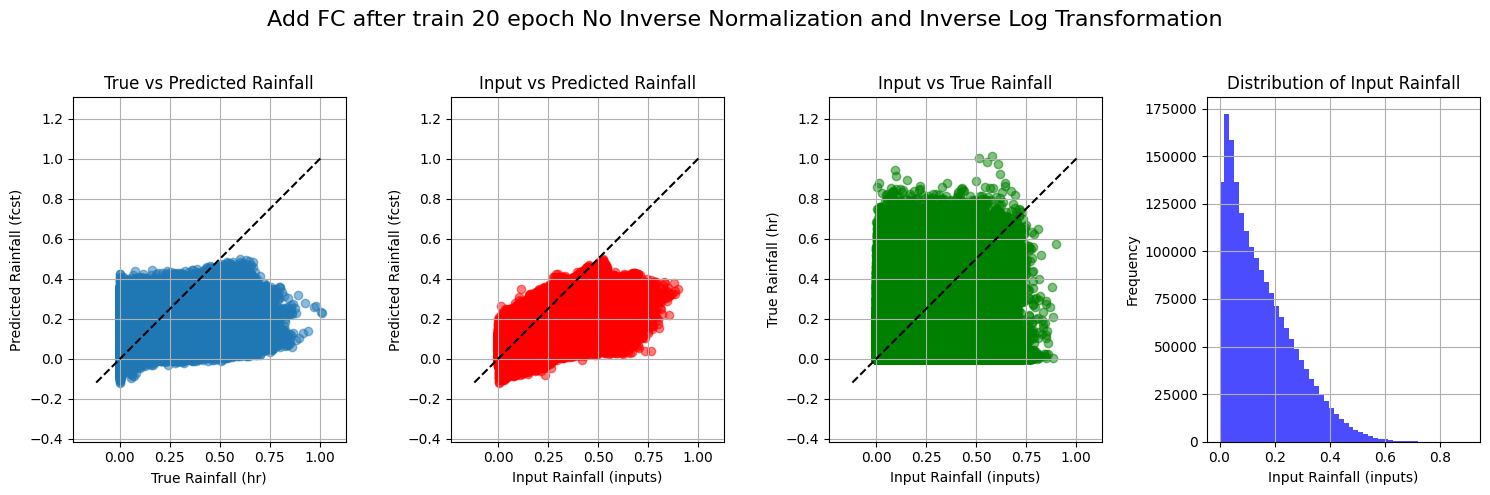

Correlation coefficient between HR and FCST: 0.59


In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_nonormfc/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Add FC after train 20 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

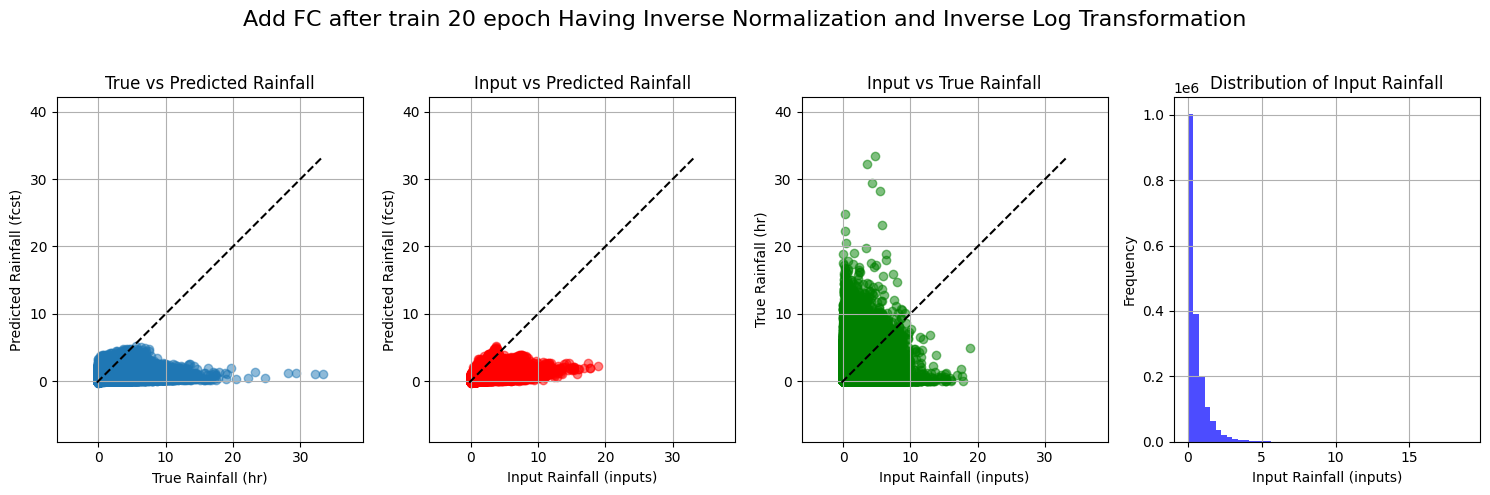

Correlation coefficient between HR and FCST: 0.54


In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.02
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_fc/prcp_downs_unet_year_2020.nc")
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Add FC after train 20 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

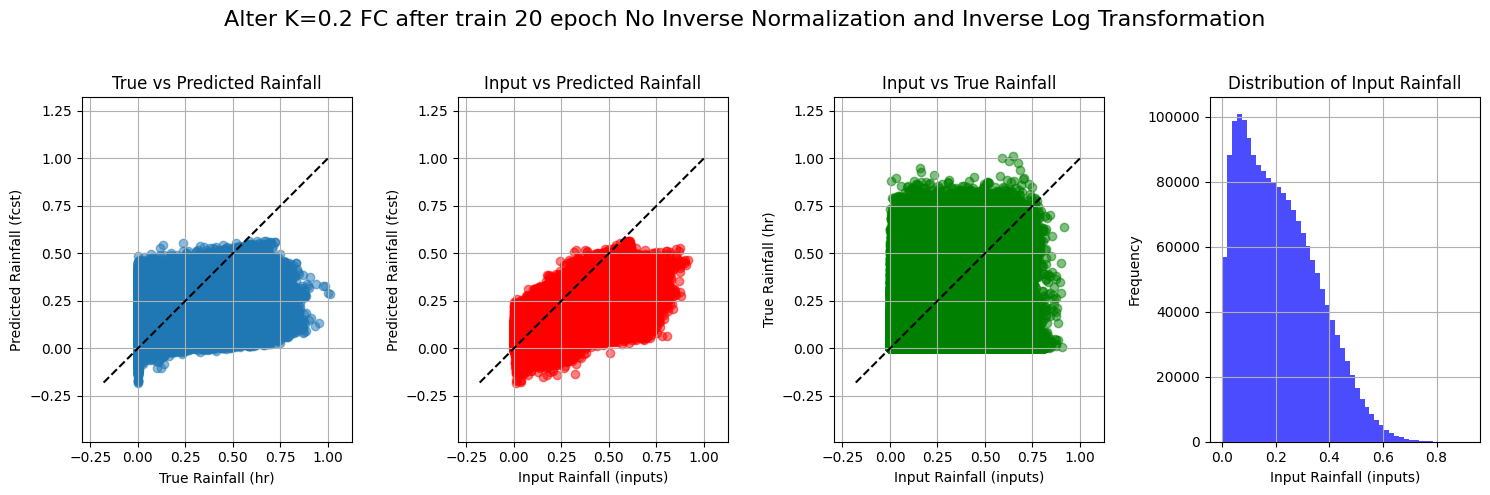

Correlation coefficient between HR and FCST: 0.59


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_nonorm0.2K/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter K=0.2 FC after train 20 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

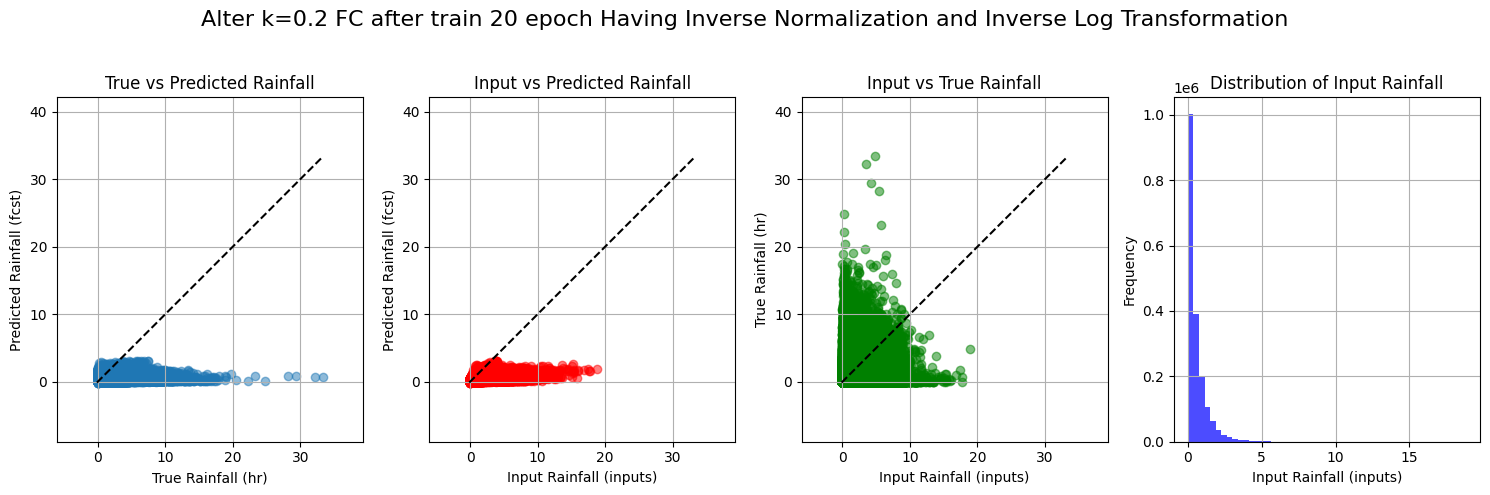

Correlation coefficient between HR and FCST: 0.51


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_0.2K/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter k=0.2 FC after train 20 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

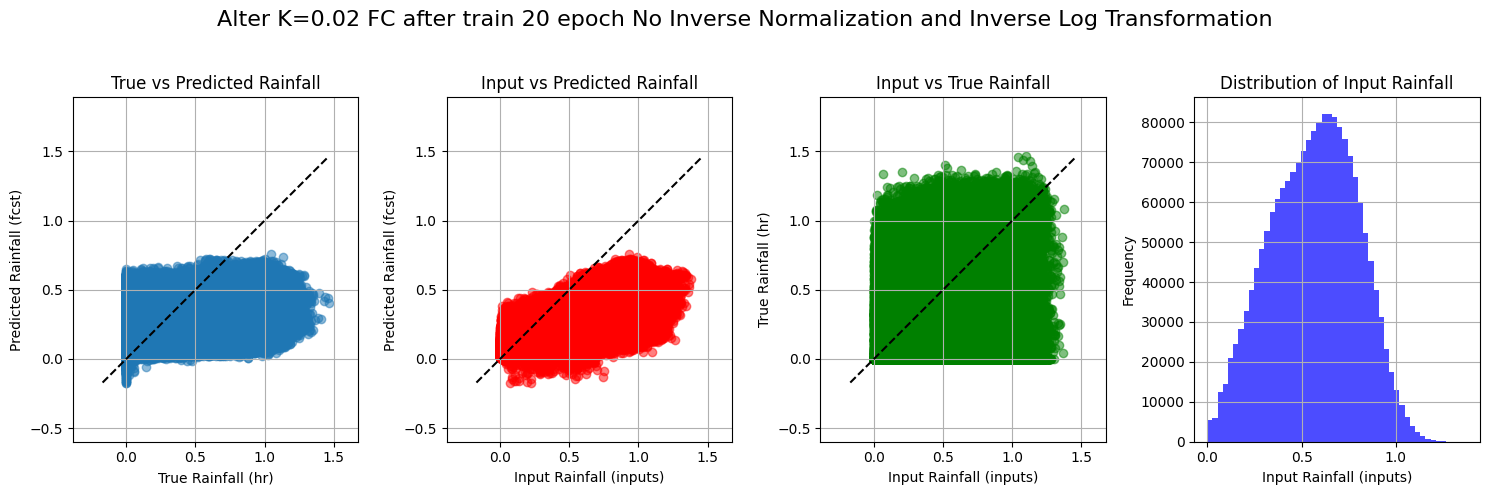

Correlation coefficient between HR and FCST: 0.54


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_nonorm0.02K/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter K=0.02 FC after train 20 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

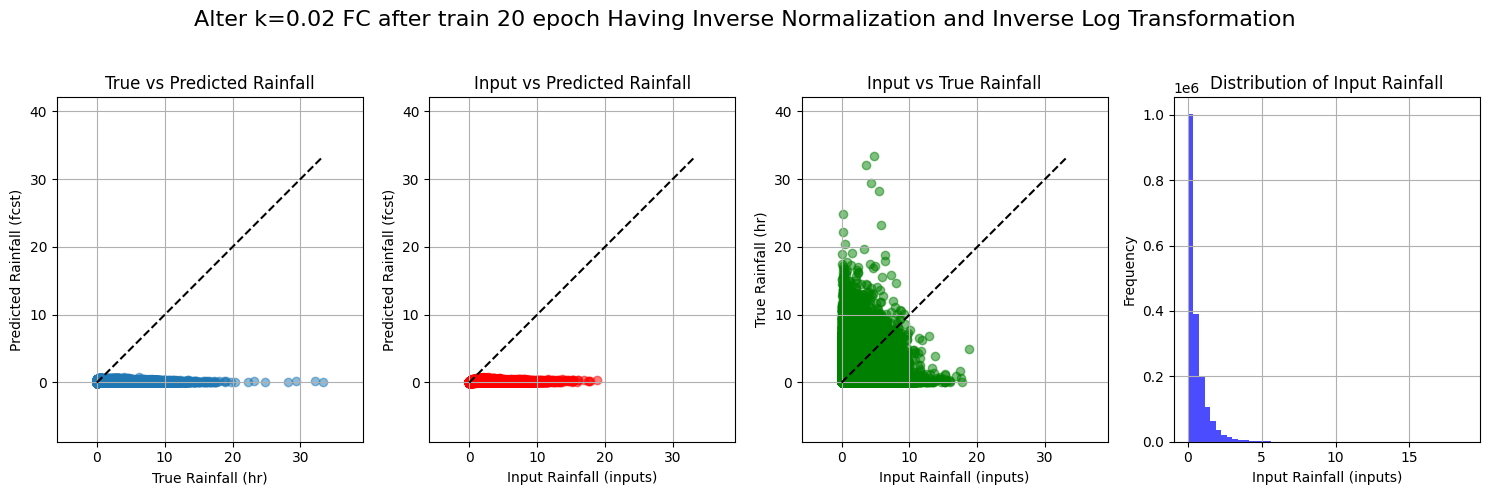

Correlation coefficient between HR and FCST: 0.43


In [6]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_20epoch_0.02K/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter k=0.02 FC after train 20 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

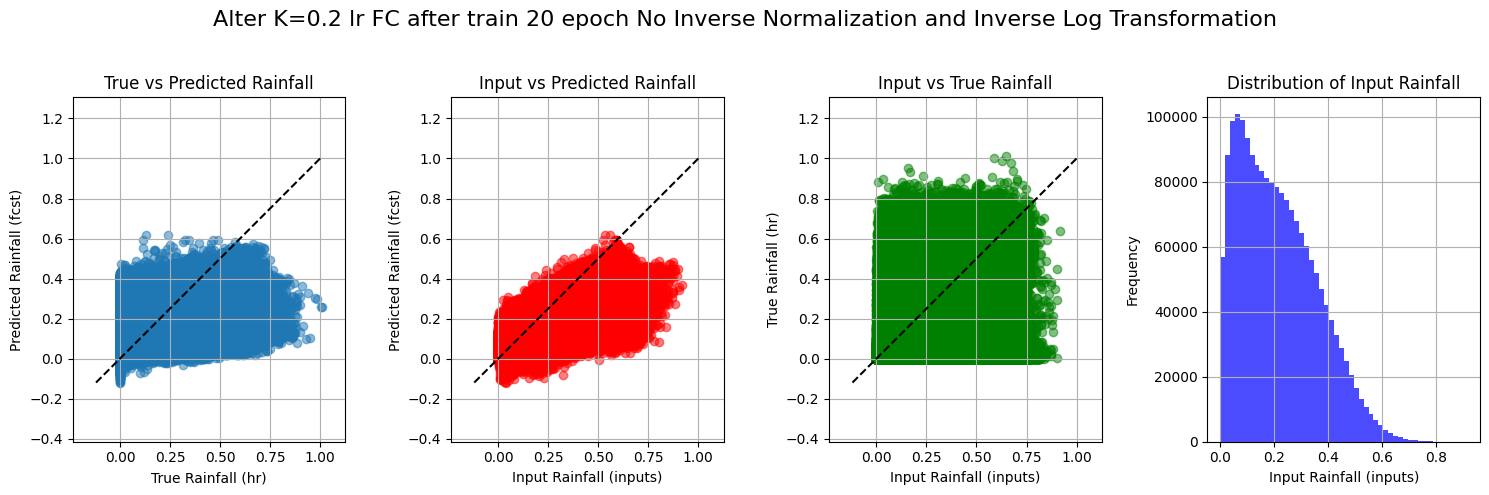

Correlation coefficient between HR and FCST: 0.59


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm0.2K_lr6grama2/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter K=0.2 lr FC after train 20 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

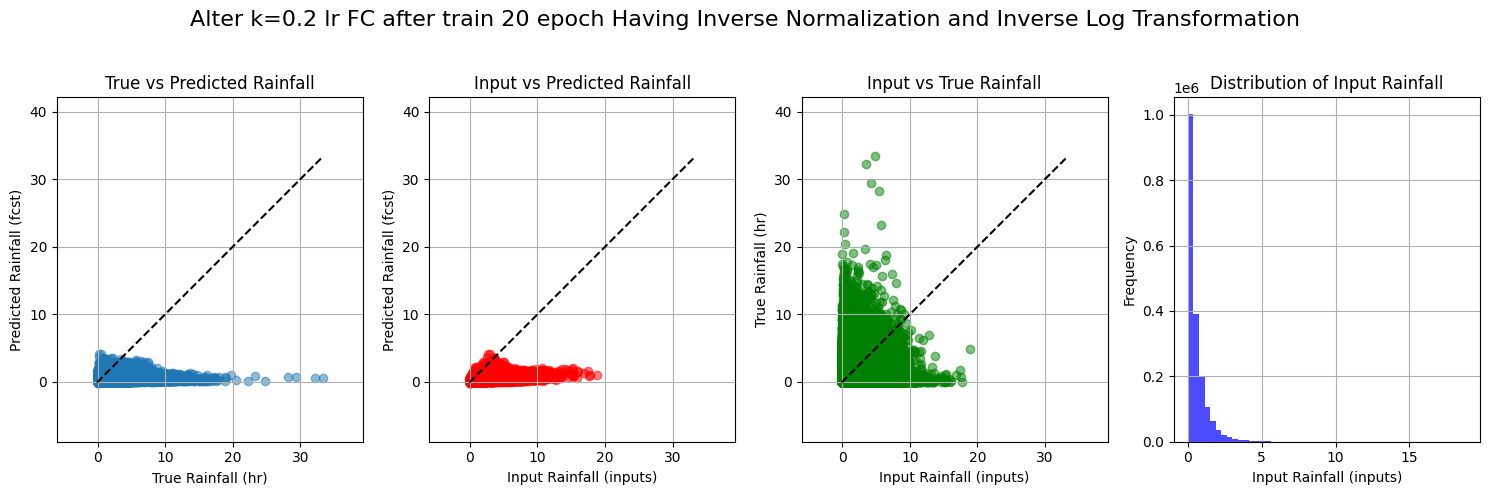

Correlation coefficient between HR and FCST: 0.50


In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_0.2K_lr6grama2/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter k=0.2 lr FC after train 20 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

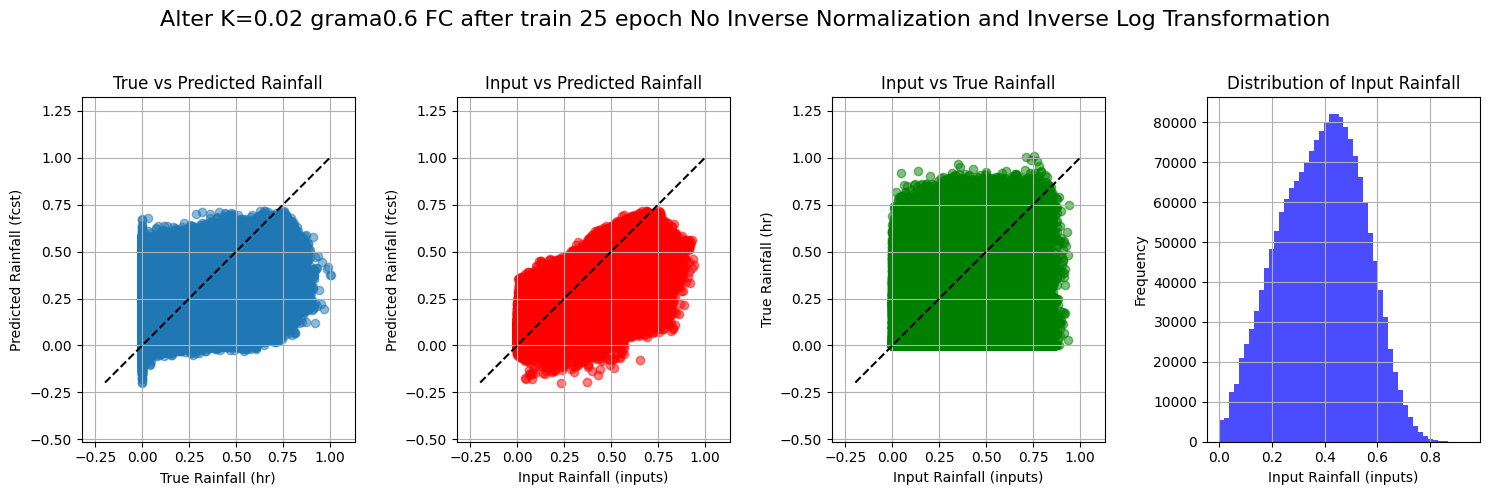

Correlation coefficient between HR and FCST: 0.59


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dm = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm0.02K_25epoch/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dm['fcst'].values.flatten(), dm['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dm['hr'].values.min(), dm['fcst'].values.min(), dm['inputs'].values.min())
max_val = max(dm['hr'].values.max(), dm['fcst'].values.max(), dm['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dm['hr'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dm['inputs'].values.flatten(), dm['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 新加入的散点图：输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dm['inputs'].values.flatten(), dm['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--')  # 添加一条完美的对角线
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dm['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter K=0.02 grama0.6 FC after train 25 epoch No Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

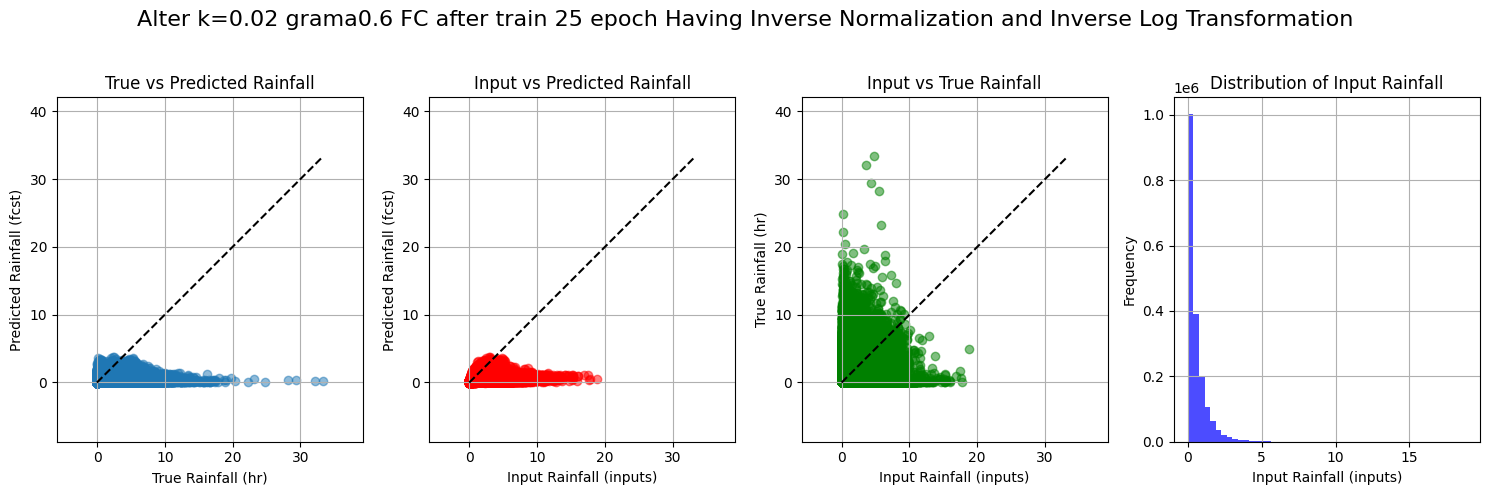

Correlation coefficient between HR and FCST: 0.48


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_0.02K_25epoch/prcp_downs_unet_year_2020.nc")

# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter k=0.02 grama0.6 FC after train 25 epoch Having Inverse Normalization and Inverse Log Transformation', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [8]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/test_output_nonorm0.02K_25epoch/prcp_downs_unet_year_2020.nc")
dn

<xarray.Dataset>
Dimensions:    (time: 7272, lat_in: 16, lon_in: 16, lat: 160, lon: 160,
                pitch_idx: 7272)
Coordinates:
  * time       (time) datetime64[ns] 2020-02-01T06:00:00 ... 2020-12-01T02:00:00
  * pitch_idx  (pitch_idx) int32 1 2 3 4 5 6 7 ... 7267 7268 7269 7270 7271 7272
Dimensions without coordinates: lat_in, lon_in, lat, lon
Data variables:
    inputs     (time, lat_in, lon_in) float32 ...
    fcst       (time, lat_in, lon_in) float32 ...
    hr         (time, lat_in, lon_in) float32 ...
    hr_orig    (time, lat, lon) float32 ...
    lats       (time, lat) float32 ...
    lons       (time, lon) float32 ...
    tops       (time, lat, lon) float32 ...
Attributes:
    description:  Precipitation downscaling data.

In [9]:
dn["inputs"]

<xarray.DataArray 'inputs' (time: 7272, lat_in: 16, lon_in: 16)>
[1861632 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01T06:00:00 ... 2020-12-01T02:00:00
Dimensions without coordinates: lat_in, lon_in

In [10]:
dn["inputs"] = dn["inputs"]*7.270026206970215
dn["fcst"] = dn["fcst"]*7.270026206970215
dn["hr"] = dn["hr"]*7.368741989135742
dn["inputs"] =0.02*(np.exp(dn["inputs"])-1)
dn["fcst"] =0.02*(np.exp(dn["fcst"])-1)
dn["hr"] =0.02*(np.exp(dn["hr"])-1)

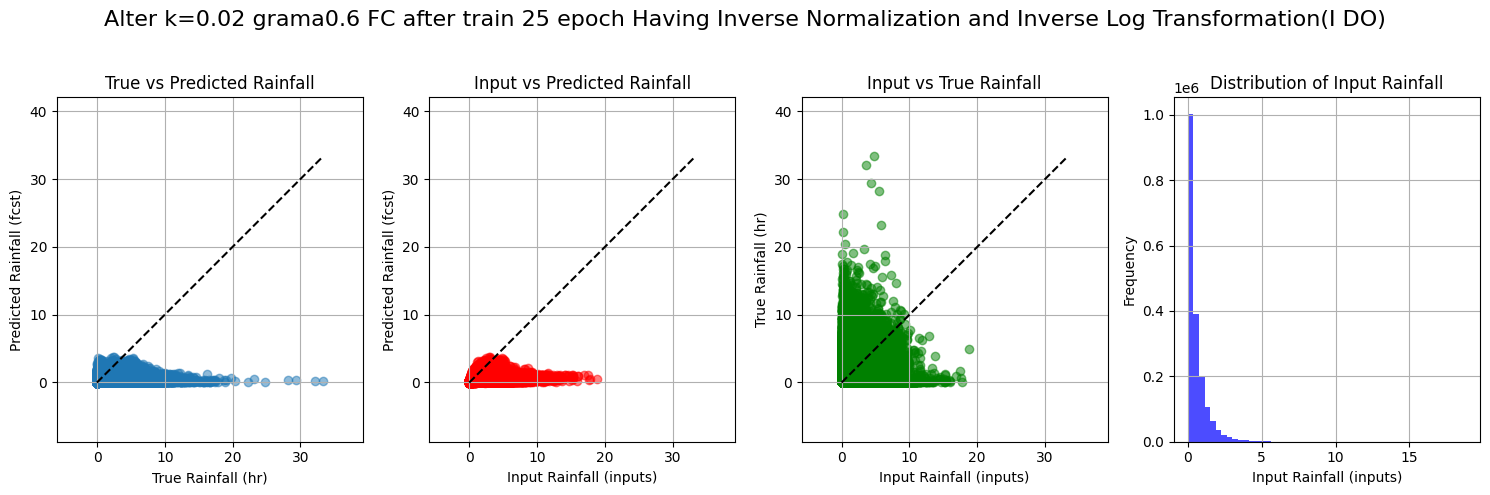

Correlation coefficient between HR and FCST: 0.48


In [11]:
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('Alter k=0.02 grama0.6 FC after train 25 epoch Having Inverse Normalization and Inverse Log Transformation(I DO)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [10]:
import json
import numpy as np
path = "/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex3/linear.json"
with open(path, 'r') as file:
    data = json.load(file)
K = np.array(data['K']).mean()
b = np.array(data['b']).mean()
K,b

(1.6988562507222538, 0.13846853365896925)

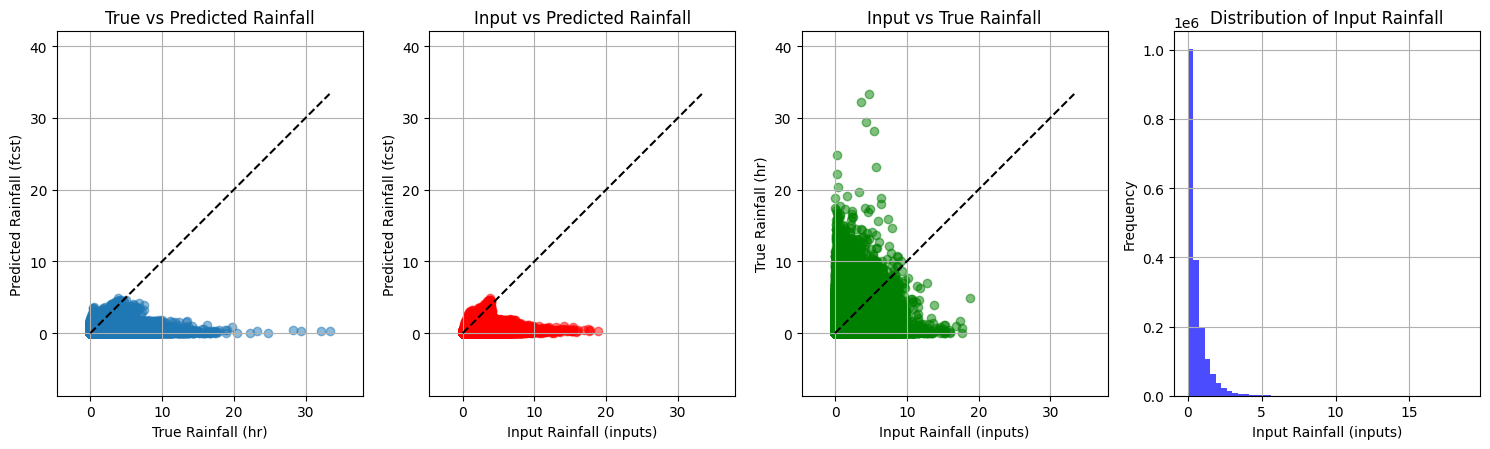

Correlation coefficient between HR and FCST: 0.46


In [13]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.02
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex1/prcp_downs_unet_year_2020.nc")
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
#dn['fcst'] = dn['fcst'] * K + b
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

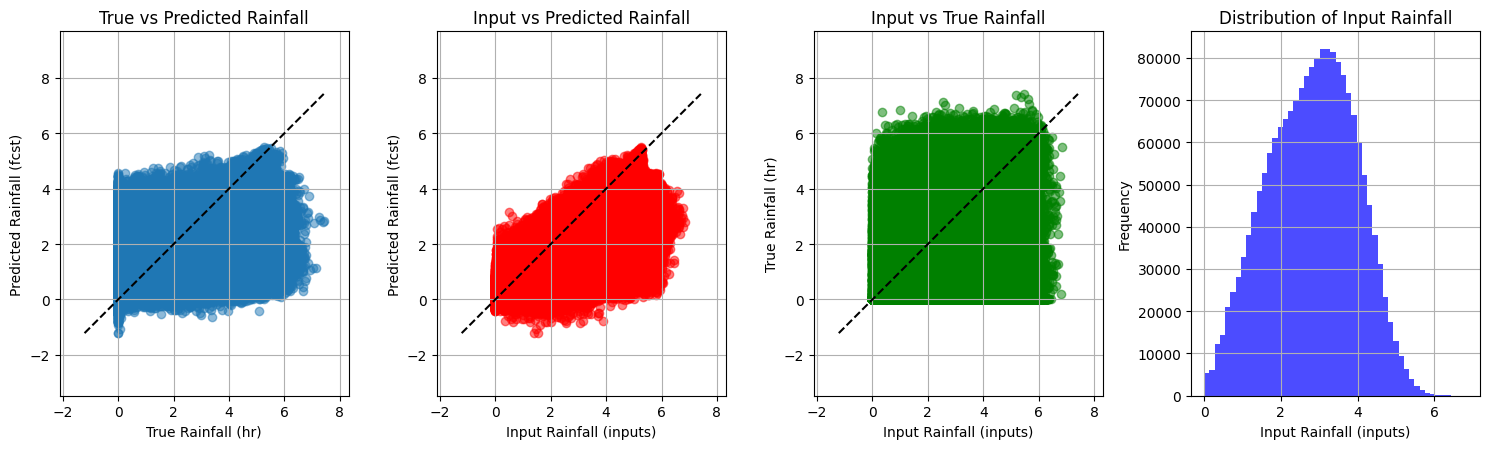

Correlation coefficient between HR and FCST: 0.58


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.02
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex1/prcp_downs_unet_year_2020.nc")

# dn['fcst'] = dn['fcst'] * K + b
dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# y = x * a + b
dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(), dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

<Figure size 1500x500 with 0 Axes>

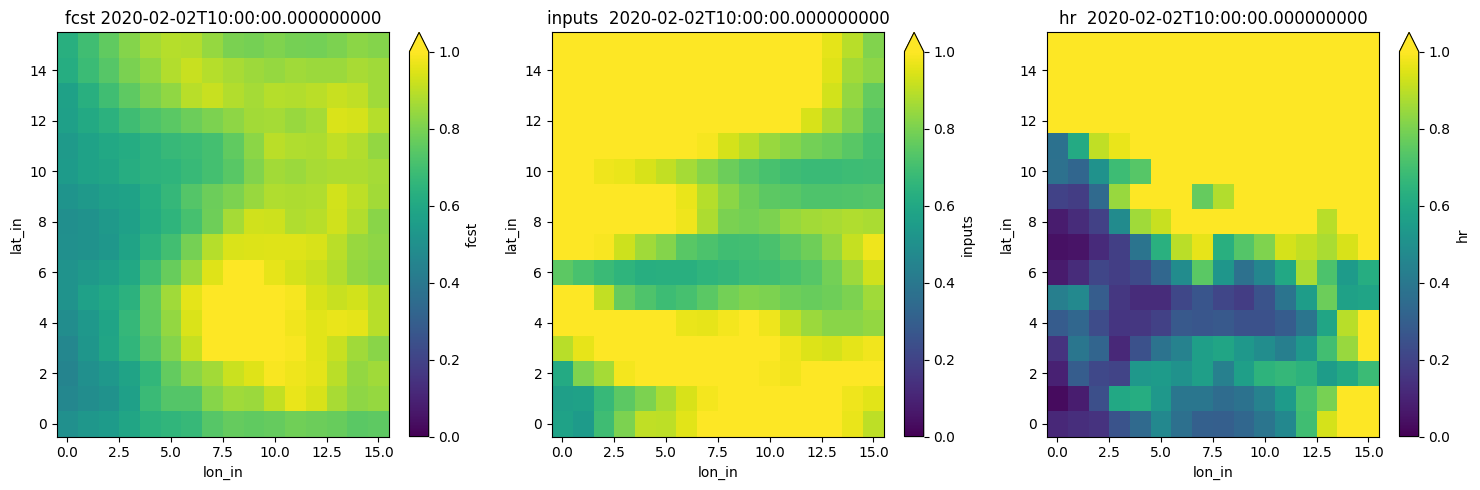

In [52]:
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex1/prcp_downs_unet_year_2020.nc")
dn['fcst'] = dn['fcst'] * K + b
plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 120
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个图
dn["fcst"].isel(time=time_index).plot(ax=axes[0], vmin=0, vmax=1)
axes[0].set_title(f'fcst {dn["time"].values[time_index]}')

# 绘制第二个图
dn["inputs"].isel(time=time_index).plot(ax=axes[1], vmin=0, vmax=1)
axes[1].set_title(f'inputs  {dn["time"].values[time_index]}')

# 绘制第三个图
dn["hr"].isel(time=time_index).plot(ax=axes[2], vmin=0, vmax=1)
axes[2].set_title(f'hr  {dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
import json
import numpy as np
path = "/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex3/linear.json"
with open(path, 'r') as file:
    data = json.load(file)
K = np.array(data['K']).mean()
b = np.array(data['b']).mean()
K,b

In [7]:
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset/test/preproc_ifs_radklim_2020-02.nc")


In [3]:
index = [
84,
204,
405,
529,
534,
535,
538,
539,
540,
542,
544,
556,
2703,
2705,
2823]
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1500x500 with 0 Axes>

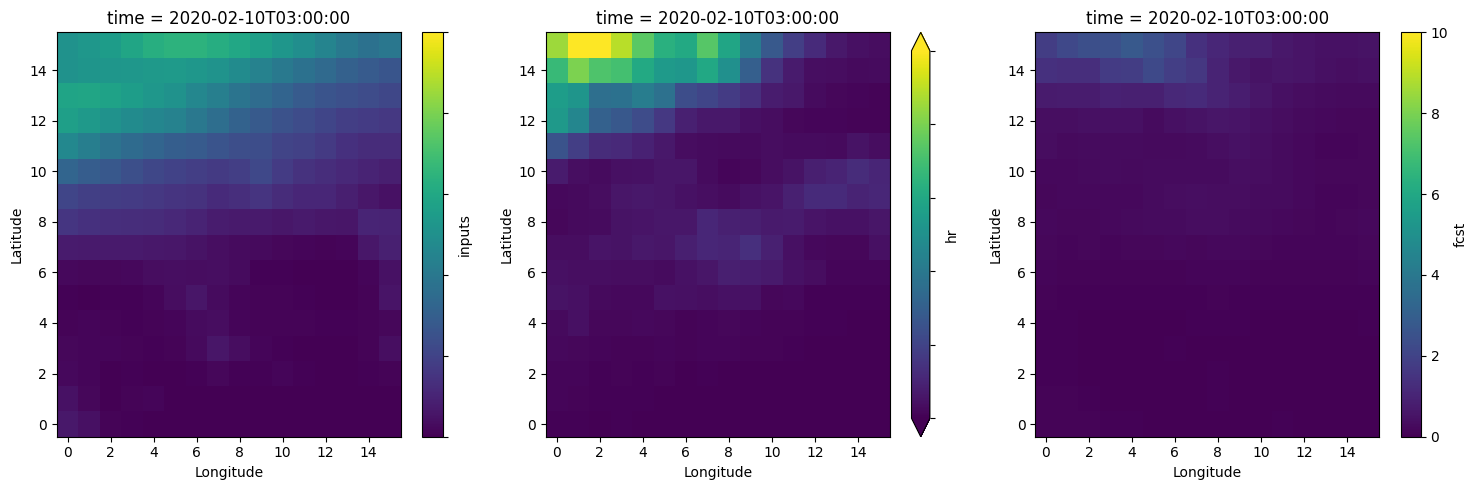

In [64]:

dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex16_part_val_norm_weight_maeloss_80/prcp_downs_unet_year_2020_0.nc")
import pandas as pd

plt.figure(figsize=(15, 5))
import matplotlib.pyplot as plt
time_index = 556 #530# 540#290    #650 #610# 580 #380 350   330    280   290
# # 创建一个 1 行 3 列的子图布局
# for time_index in range(3000):
#     value = dn["hr"].isel(time=time_index).max()
#     if value  >= 10:
#         print(time_index)


fig, axes = plt.subplots(1, 3, figsize=(15,5))
time = pd.to_datetime(dn["time"].values[time_index]).isoformat()
# 绘制第一个图
dn["inputs"].isel(time=time_index).plot(ax=axes[0], vmin=0, vmax=10,cbar_kwargs={'format': ''})
axes[0].set_title(f'time = {time}')
axes[0].set_xlabel('Longitude')  
axes[0].set_ylabel('Latitude') 

# 绘制第二个图
dn["hr"].isel(time=time_index).plot(ax=axes[1], vmin=0, vmax=10,cbar_kwargs={'format': ''} )
axes[1].set_title(f'time = {time}')
axes[1].set_xlabel('Longitude')  
axes[1].set_ylabel('Latitude') 
# 绘制第三个图  'ticks': [0, 2, 4, 6, 8, 10] 
dn["fcst"].isel(time=time_index).plot(ax=axes[2], vmin=0, vmax=10,cbar_kwargs={'format': ''})
axes[2].set_title(f'time = {time}')
axes[2].set_xlabel('Longitude')  
axes[2].set_ylabel('Latitude') 

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

# 
#  高分辨率与input的图片 （一张即可）
# input hr fcst 三个图片 (分别找2张比较合理的图片，和不合理的图片)
# mae,cc,FSS  3个指标
# 继续训练 MAX 80的模型

<Figure size 1500x500 with 0 Axes>

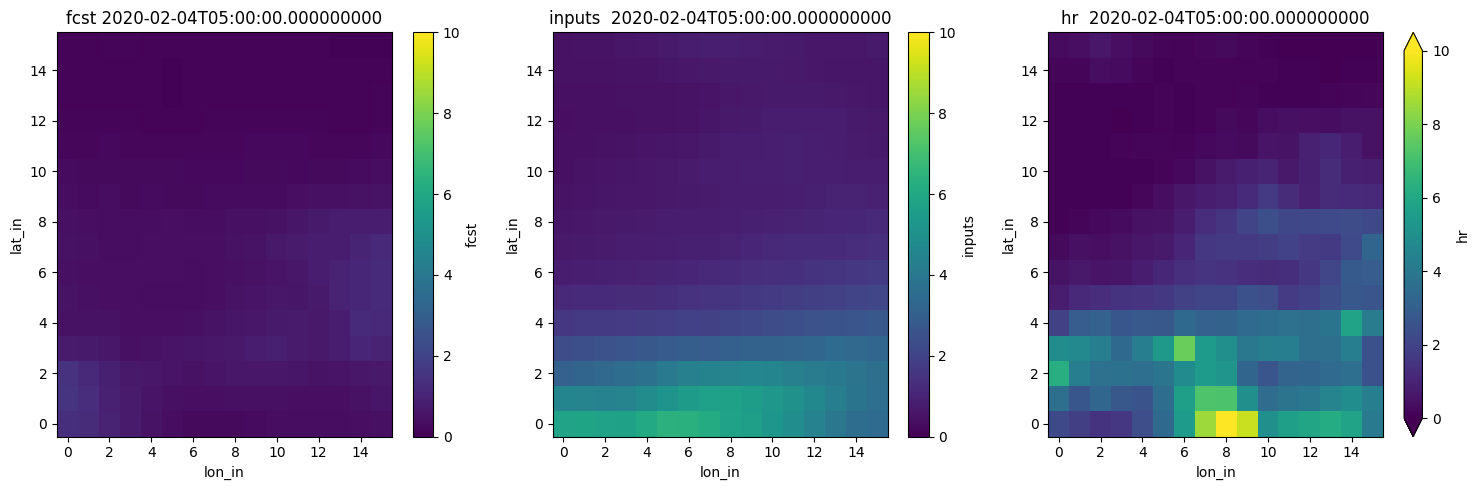

In [9]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex16_part_val_norm_weight_maeloss_80/prcp_downs_unet_year_2020_0.nc")
# cp = dn["cp_in"].diff(dim="time") * 1000
# lsp = dn["lsp_in"].diff(dim="time") *1000

# dn = dn.assign(tp=cp+lsp)

plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 405
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个图
dn["fcst"].isel(time=time_index).plot(ax=axes[0], vmin=0, vmax=10)
axes[0].set_title(f'fcst {dn["time"].values[time_index]}')

# 绘制第二个图
dn["inputs"].isel(time=time_index).plot(ax=axes[1], vmin=0, vmax=10)
axes[1].set_title(f'inputs  {dn["time"].values[time_index]}')

# 绘制第三个图
dn["hr"].isel(time=time_index).plot(ax=axes[2], vmin=0, vmax=10)
axes[2].set_title(f'hr  {dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

<Figure size 1500x500 with 0 Axes>

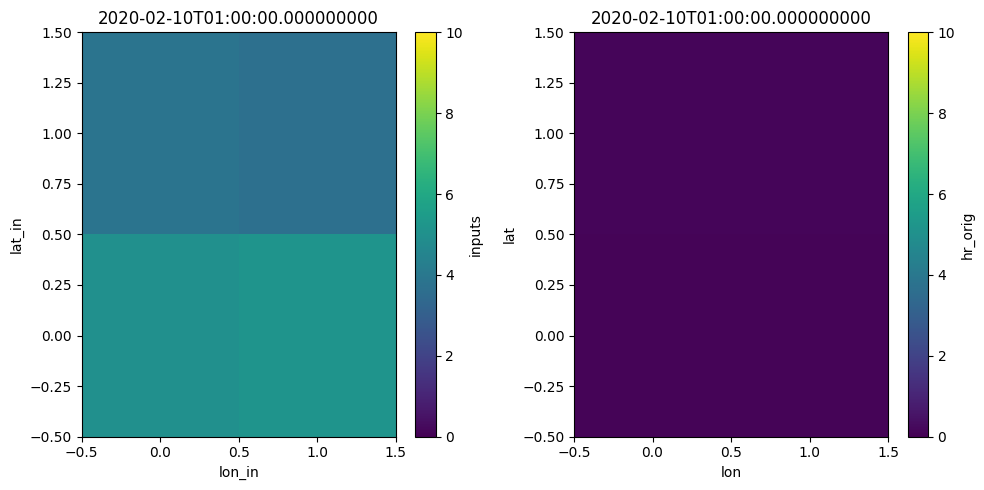

In [36]:

dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex16_part_val_norm_weight_maeloss_80/prcp_downs_unet_year_2020.nc")

plt.figure(figsize=(15, 5))
import matplotlib.pyplot as plt
time_index =  544   #530# 540#290    #650 #610# 580 #380 350   330    280   290
# # 创建一个 1 行 3 列的子图布局
# for time_index in range(3000):
#     value = dn["hr"].isel(time=time_index).max()
#     if value  >= 10:
#         print(time_index)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# 绘制第二个图
dn["inputs"].isel(time=time_index).sel(lon_in = slice(5,7),lat_in = slice(10,12)).plot(ax=axes[0], vmin=0, vmax=10)
axes[0].set_title(f'{dn["time"].values[time_index]}')

# 绘制第三个图
dn["hr_orig"].isel(time=time_index).sel(lon = slice(5,7),lat = slice(10,12)).plot(ax=axes[1], vmin=0, vmax=10)
axes[1].set_title(f'{dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

# 
#  高分辨率与input的图片 （一张即可）
# input hr fcst 三个图片 (分别找2张比较合理的图片，和不合理的图片)
# mae,cc,FSS  3个指标
# 继续训练 MAX 80的模型

<Figure size 1500x500 with 0 Axes>

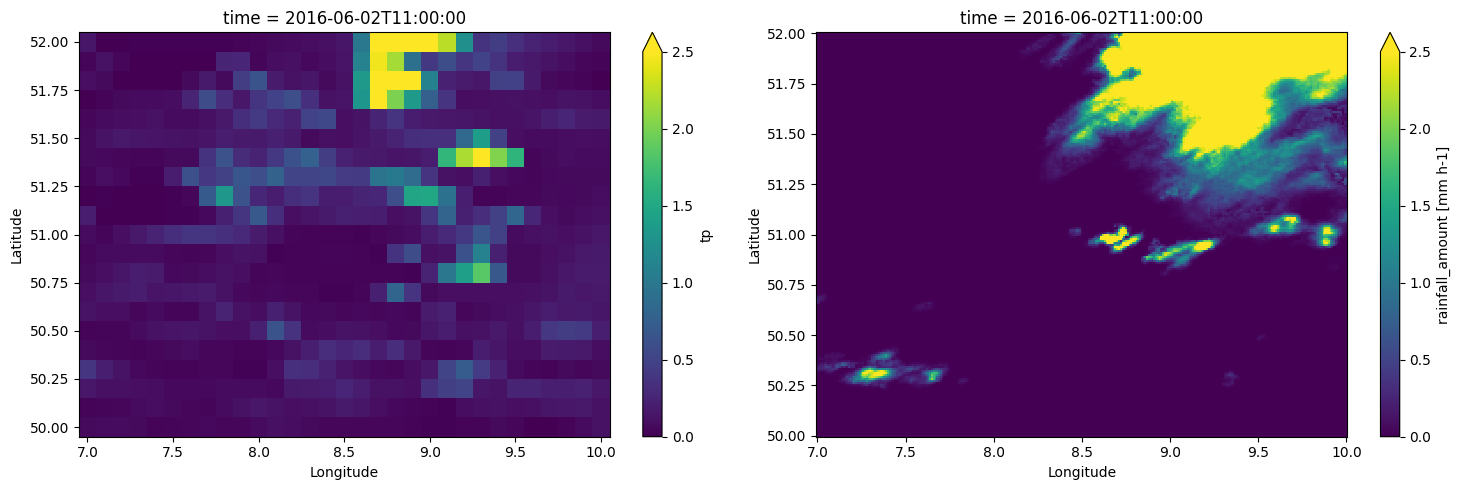

In [12]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/train/preproc_ifs_radklim_2016-06.nc")
cp = dn["cp_in"].diff(dim="time") * 1000
lsp = dn["lsp_in"].diff(dim="time") *1000

dn = dn.assign(tp=cp+lsp)

plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 30

time = pd.to_datetime(dn["time"].values[time_index]).isoformat()
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


dn["tp"].isel(time=time_index,).sel(lon = slice(7,10),lat = slice(50,52)).plot(ax=axes[0], vmin=0, vmax=2.5)
axes[0].set_title(f'time = {time}')
axes[0].set_xlabel('Longitude')  
axes[0].set_ylabel('Latitude')   


dn["yw_hourly_tar"].isel(time=time_index,).sel(lon_tar = slice(7,10),lat_tar = slice(50,52)).plot(ax=axes[1], vmin=0, vmax=2.5)
axes[1].set_title(f'time = {time}')
axes[1].set_xlabel('Longitude')  
axes[1].set_ylabel('Latitude')  

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()
# 俩张

<Figure size 1500x500 with 0 Axes>

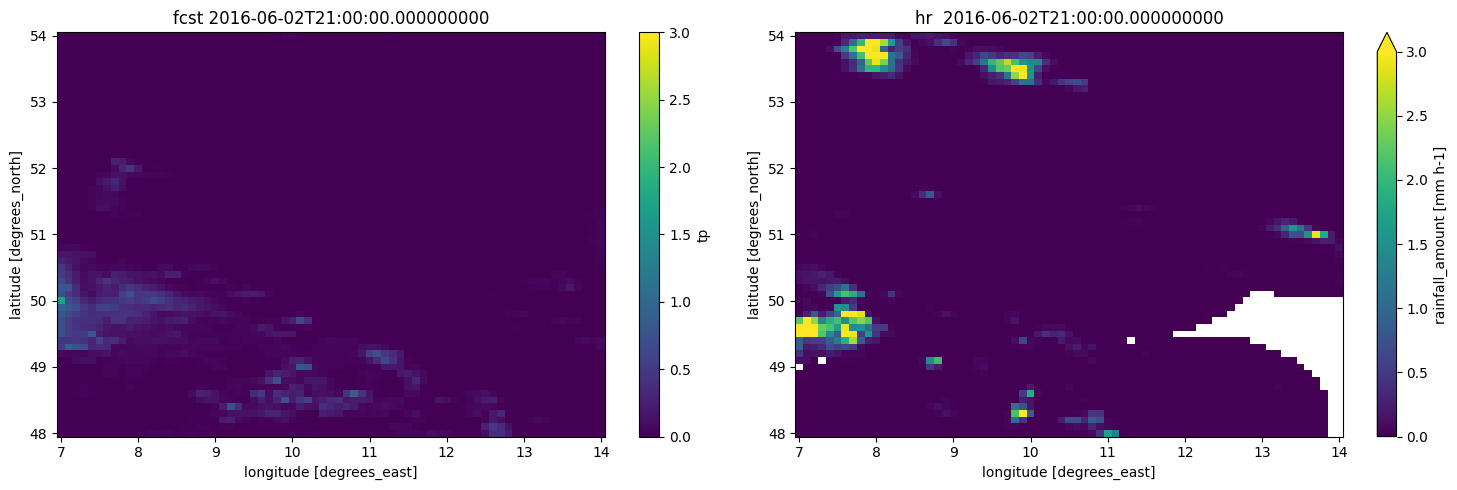

In [18]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset/train/preproc_ifs_radklim_2016-06.nc")
cp = dn["cp_in"].diff(dim="time") * 1000
lsp = dn["lsp_in"].diff(dim="time") *1000

dn = dn.assign(tp=cp+lsp)

plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 40
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


dn["tp"].isel(time=time_index,).sel(lon = slice(7,14),lat = slice(48,54)).plot(ax=axes[0], vmin=0, vmax=3)
axes[0].set_title(f'fcst {dn["time"].values[time_index]}')


dn["yw_hourly_in"].isel(time=time_index,).sel(lon = slice(7,14),lat = slice(48,54)).plot(ax=axes[1], vmin=0, vmax=3)
axes[1].set_title(f'hr  {dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

In [5]:
import json
import numpy as np
path = "/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex3/linear.json"
with open(path, 'r') as file:
    data = json.load(file)
K = np.array(data['K']).mean()
b = np.array(data['b']).mean()
K,b

(1.6988562507222538, 0.13846853365896925)

In [9]:
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex7/prcp_downs_unet_year_2020.nc")
k = 0.1
# dn['fcst'] = dn['fcst'] * K + b
dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
true_d = dn['hr'].values
print(true_d.min(),true_d.max())

0.0 7.419679


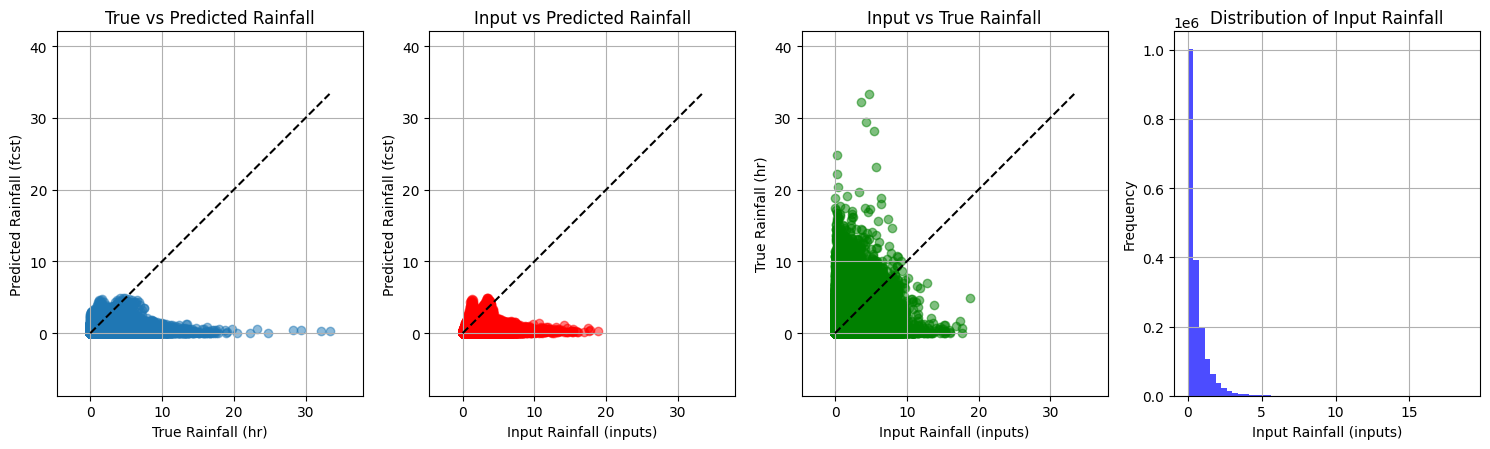

Correlation coefficient between HR and FCST: 0.46


In [44]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.05
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex6/prcp_downs_unet_year_2020.nc")
# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k*0.8) - np.log(k*0.8)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.1
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex7/prcp_downs_unet_year_2020.nc")
# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.004
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex12_unet/prcp_downs_unet_year_2020.nc")

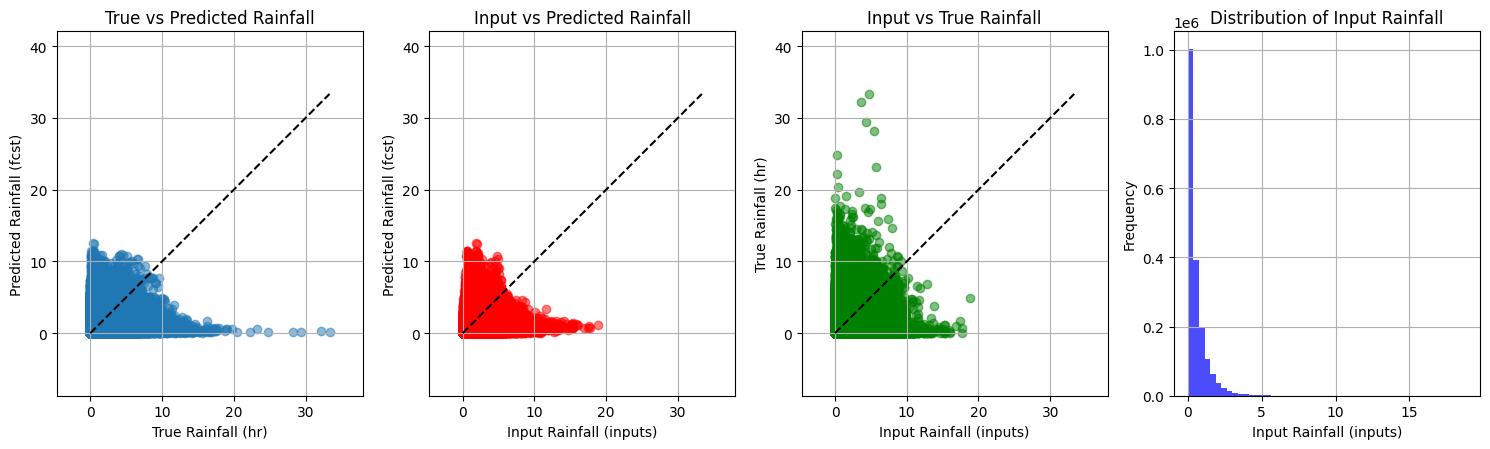

Correlation coefficient between HR and FCST: 0.35


In [39]:

# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])
  
# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['inputs'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Input Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

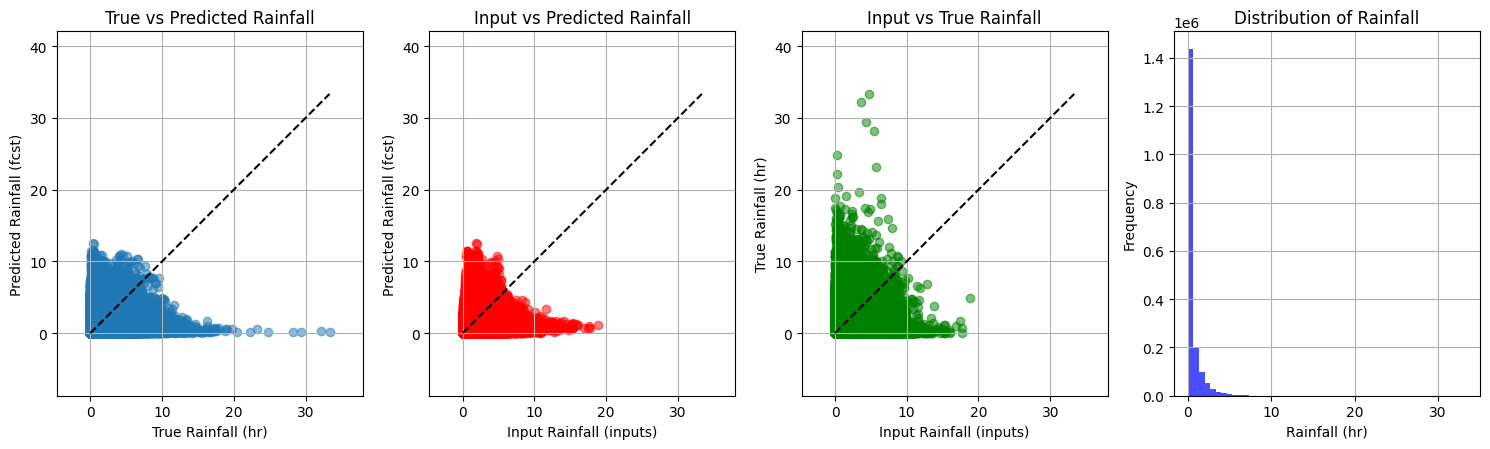

Correlation coefficient between HR and FCST: 0.35


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.006
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex12_unet/prcp_downs_unet_year_2020.nc")
# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])
  
# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['hr'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (hr)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [28]:
top = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/topography_srtm_ifs2radklim.nc")
top = top['surface_elevation']
_min = top.min().values
_max = top.max().values
_avg = top.mean().values
_std = top.std().values
_min,_max,_avg,_std

(array(-182., dtype=float32),
 array(3846., dtype=float32),
 array(312.71216, dtype=float32),
 array(442.65375, dtype=float32))

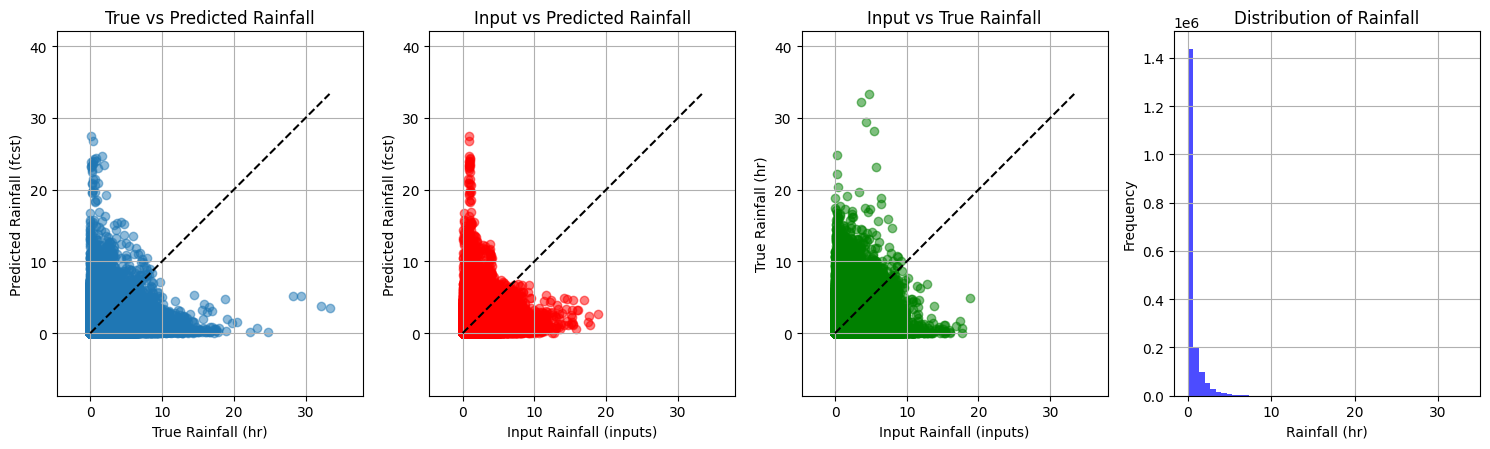

Correlation coefficient between HR and FCST: 0.35


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.006
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex15_5var_L1/prcp_downs_unet_year_2020.nc")
# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])
  
# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['hr'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (hr)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

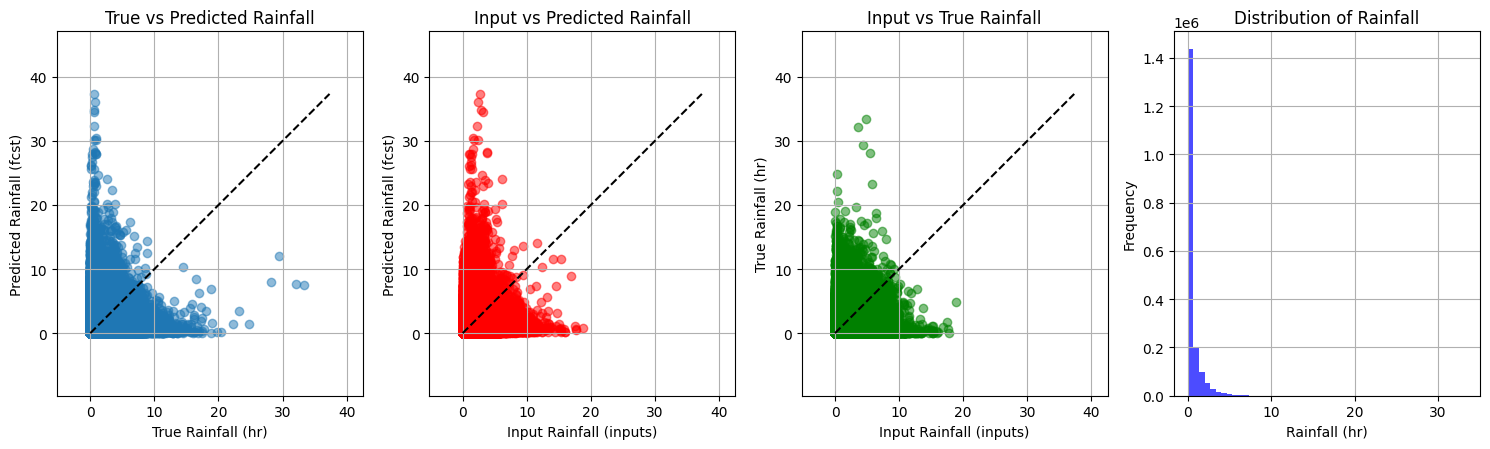

Correlation coefficient between HR and FCST: 0.25


In [6]:

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.005
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/test/prcp_downs_unet_year_2020.nc")
# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制输入与预测值的散点图
plt.subplot(1, 4, 2)
plt.scatter(dn['inputs'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5, color='red')
plt.title('Input vs Predicted Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])
  
# 输入与真实值的比较
plt.subplot(1, 4, 3)
plt.scatter(dn['inputs'].values.flatten(), dn['hr'].values.flatten(), alpha=0.5, color='green')
plt.title('Input vs True Rainfall')
plt.xlabel('Input Rainfall (inputs)')
plt.ylabel('True Rainfall (hr)')
plt.grid(True)
plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

# 绘制inputs的直方图
plt.subplot(1, 4, 4)
plt.hist(dn['hr'].values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Rainfall')
plt.xlabel('Rainfall (hr)')
plt.ylabel('Frequency')
plt.grid(True)

plt.suptitle('', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.005
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex16_all_val_norm_weight_maeloss_80_end1/prcp_downs_unet_year_2020.nc")
y_pred = dn['fcst']
tar = dn['hr']
# y_pred = np.log(1 + y_pred / k)
# tar = np.log(1 + tar / k)
mae_loss = np.mean(np.abs(y_pred - tar)).values
rmse_loss = np.sqrt(np.mean((y_pred - tar)**2)).values
A = (y_pred - np.mean(y_pred))
B = (tar - np.mean(tar))
CC = np.sum( A * B) / np.sqrt(np.sum(A * A) * np.sum(B * B))

# weigh_mae_loss
weights = np.array(tar)
MIN = np.log(1 + 0.1)
MAX = np.log(1 + 80)
weights[tar < MIN] = MIN 
weights[tar >= MAX] = MAX
weigh_mae_loss = np.mean(np.abs(y_pred - tar) * weights)
print(f'mse_loss :{rmse_loss}')
print(f'mae_loss :{mae_loss} \nweigh_mae_loss :{weigh_mae_loss.values} \nCC : {CC.values}')

mse_loss :1.0772758722305298
mae_loss :0.5903103947639465 
weigh_mae_loss :0.7729381322860718 
CC : 0.2522977888584137


In [4]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.005
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex3/prcp_downs_unet_year_2020.nc")
y_pred = dn['fcst']
tar = dn['hr']
# y_pred = np.log(1 + y_pred / k)
# tar = np.log(1 + tar / k)
mae_loss = np.mean(np.abs(y_pred - tar)).values
rmse_loss = np.sqrt(np.mean((y_pred - tar)**2)).values
A = (y_pred - np.mean(y_pred))
B = (tar - np.mean(tar))
CC = np.sum( A * B) / np.sqrt(np.sum(A * A) * np.sum(B * B))

# weigh_mae_loss
weights = np.array(tar)
MIN = np.log(1 + 0.1)
MAX = np.log(1 + 80)
weights[tar < MIN] = MIN 
weights[tar >= MAX] = MAX
weigh_mae_loss = np.mean(np.abs(y_pred - tar) * weights)
print(f'mse_loss :{rmse_loss}')
print(f'mae_loss :{mae_loss} \nweigh_mae_loss :{weigh_mae_loss.values} \nCC : {CC.values}')

mse_loss :0.9519395232200623
mae_loss :0.5324968099594116 
weigh_mae_loss :0.851088285446167 
CC : 0.29353323578834534


In [68]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
k = 0.005
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/zx_results/ex16_all_val_norm_weight_maeloss_80_end1/prcp_downs_unet_year_2020.nc")
y_pred = dn['fcst']
tar = dn['hr']
# y_pred = np.log(1 + y_pred / k)
# tar = np.log(1 + tar / k)
mae_loss = np.mean(np.abs(y_pred - tar)).values
rmse_loss = np.sqrt(np.mean((y_pred - tar)**2)).values
A = (y_pred - np.mean(y_pred))
B = (tar - np.mean(tar))
CC = np.sum( A * B) / np.sqrt(np.sum(A * A) * np.sum(B * B))

# weigh_mae_loss
weights = np.array(tar)
MIN = np.log(1 + 0.1)
MAX = np.log(1 + 80)
weights[tar < MIN] = MIN 
weights[tar >= MAX] = MAX
weigh_mae_loss = np.mean(np.abs(y_pred - tar) * weights)
print(f'mse_loss :{rmse_loss}')
print(f'mae_loss :{mae_loss} \nCC : {CC.values}')

mse_loss :1.0772758722305298
mae_loss :0.5903103947639465 
CC : 0.2522977888584137


In [69]:
y_pred_np = y_pred.values
tar_np = tar.values
tar_np = tar_np.reshape(tar_np.shape[1],-1)
y_pred_np = y_pred_np.reshape(y_pred_np.shape[1],-1)

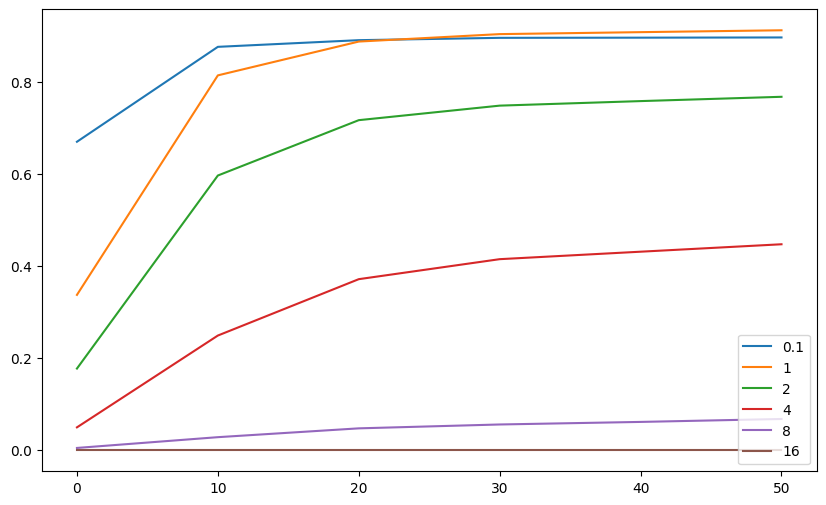

In [75]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation
import numpy as np
from pysteps.verification.spatialscores import fss


# 设置不同阈值和窗口尺度
thresholds = [0.1,1,2,4,8,16]  
radii = [0,10,20,30,40,50]  
fss_results = {threshold: [] for threshold in thresholds}

# 计算不同阈值和窗口尺度下的 FSS
for radius in radii:
    for threshold in thresholds:
        fss_value = fss(y_pred_np, tar_np, threshold,scale=radius)
        fss_results[threshold].append(fss_value)

# 绘制 FSS 图表
plt.figure(figsize=(10, 6))
for threshold, fss_values in fss_results.items():
    plt.plot(radii, fss_values, label=f'{threshold}')
    # for i, value in enumerate(fss_values):
    #     plt.vlines(x=radii[i], ymin=0, ymax=2, color='black', linestyle='dashed', linewidth=1)
plt.grid(False)  # 关闭网格
plt.legend(loc='lower right')  # 设置图例在右下角

plt.show()


In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator

k = 0.008
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex2/prcp_downs_unet_year_2020.nc")
input = dn['inputs'].values
y_pred = dn['fcst']
tar = dn['hr']

# y_pred = np.log(1 + y_pred / k)
# tar = np.log(1 + tar / k)
def cac(y_pred,tar):
    mae_loss = np.mean(np.abs(y_pred - tar)).item()
    rmse_loss = np.sqrt(np.mean((y_pred - tar)**2)).item()
    A = (y_pred - np.mean(y_pred))
    B = (tar - np.mean(tar))
    CC = np.sum( A * B) / np.sqrt(np.sum(A * A) * np.sum(B * B)).item()
    return mae_loss,rmse_loss,CC

# # weigh_mae_loss
# weights = np.array(tar)
# MIN = np.log(1 + 0.1)
# MAX = np.log(1 + 80)
# weights[tar < MIN] = MIN 
# weights[tar >= MAX] = MAX
# weigh_mae_loss = np.mean(np.abs(y_pred - tar) * weights)
mae_loss,rmse_loss,CC = cac(y_pred.values,tar.values)
print(f'mse_loss :{rmse_loss} \nmae_loss :{mae_loss} \nCC : {CC}')

mae_loss,rmse_loss,CC = cac(L.values,tar.values)
print(f'mse_loss :{rmse_loss} \nmae_loss :{mae_loss} \nCC : {CC}')

In [ ]:
import xarray as xr
import numpy as np
from scipy.interpolate import RegularGridInterpolator

ds = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex2/prcp_downs_unet_year_2020.nc")
inputs = ds['inputs'].values  
lats_in = ds['lat_in'].values  # 低分辨率的纬度
lons_in = ds['lon_in'].values  # 低分辨率的经度
lats = ds['lat'].values # 高分辨率的纬度
lons = ds['lon'].values  # 高分辨率的经度
inputs_interp = np.zeros((inputs.shape[0], len(lats), len(lons)))

# 对每个时间步进行插值
for t in range(inputs.shape[0]):
    interp_func = RegularGridInterpolator((lats_in, lons_in), inputs[t])  # 选择时间步 t 的 inputs

    points = np.array([[i,j] for i in lats for j in lons])
    inputs_interp[t] = interp_func(points)
inputs_interp

Correlation coefficient between HR and FCST: 0.16


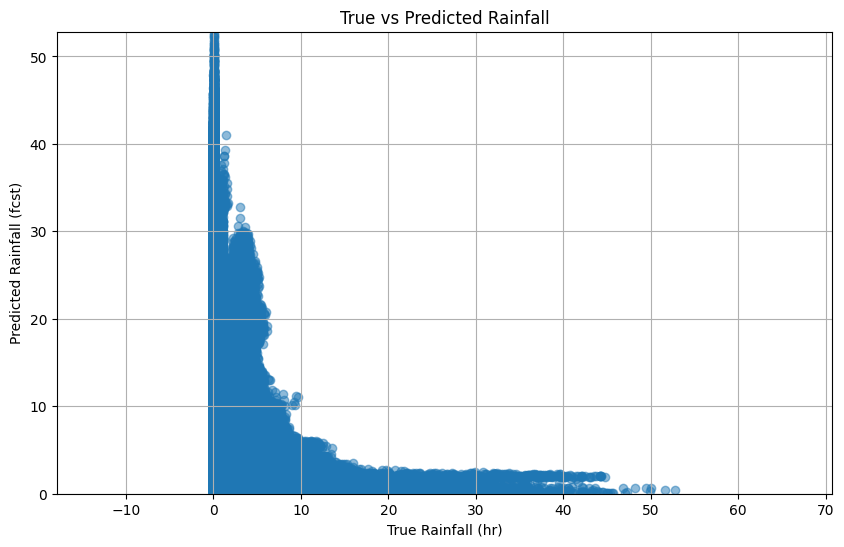

In [9]:

k = 0.005
dn = xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex2/prcp_downs_unet_year_2020.nc").compute()

# dn['fcst'] = dn['fcst'] * K + b
# dn['hr'] = np.log(dn['hr'] + k) - np.log(k)
# dn['fcst'] = np.log(dn['fcst'] + k) - np.log(k)
# # # y = x * a + b
# dn['inputs'] = np.log(dn['inputs'] + k) - np.log(k)
# 计算预测与真实数据之间的相关性
correlation = np.corrcoef(dn['fcst'].values.flatten(), dn['hr'].values.flatten())[0, 1]

# 确定数据范围 dn['inputs'].values.min()
min_val = min(dn['hr'].values.min(), dn['fcst'].values.min(), dn['inputs'].values.min())
max_val = max(dn['hr'].values.max(), dn['fcst'].values.max(),dn['inputs'].values.max())

# 绘制预测值与真实值的散点图
plt.figure(figsize=(10, 6))
# plt.subplot(1, 2, 1)
plt.scatter(dn['hr'].values.flatten(), dn['fcst'].values.flatten(), alpha=0.5)
plt.title('True vs Predicted Rainfall')
plt.xlabel('True Rainfall (hr)')
plt.ylabel('Predicted Rainfall (fcst)')
plt.grid(True)
# plt.plot([min_val, max_val], [min_val, max_val], 'k--') 
plt.axis('equal')
plt.xlim([min_val, max_val])
plt.ylim([min_val, max_val])

print(f"Correlation coefficient between HR and FCST: {correlation:.2f}")

<Figure size 1500x500 with 0 Axes>

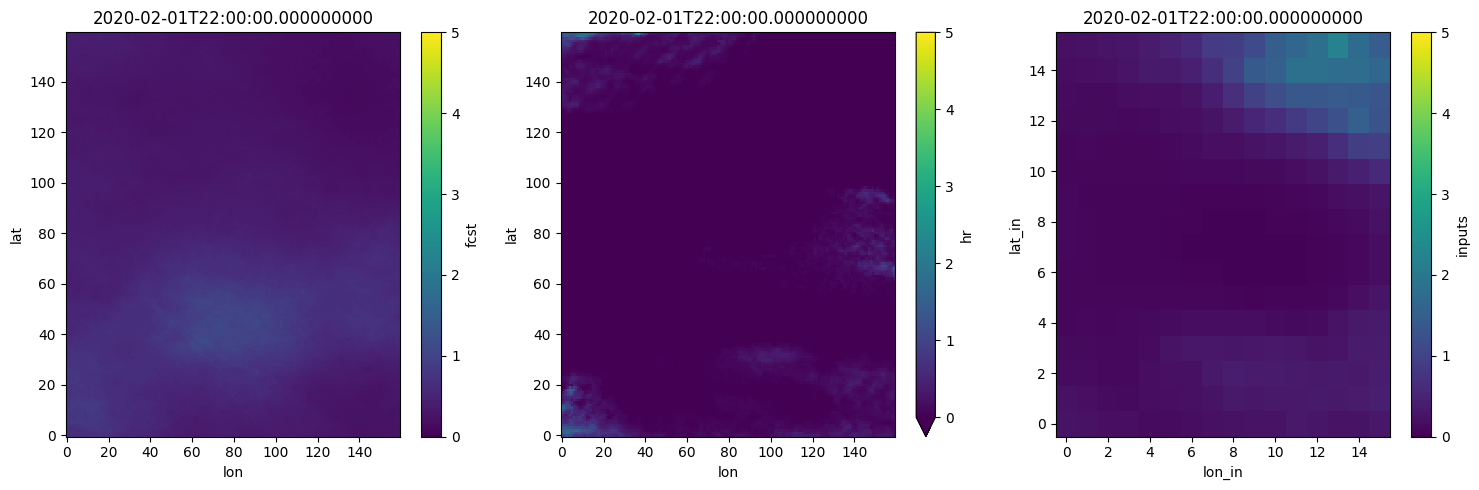

In [15]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex2/prcp_downs_unet_year_2020.nc")


plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 80
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


dn["fcst"].isel(time=time_index,).plot(ax=axes[0], vmin=0, vmax=5)
axes[0].set_title(f'{dn["time"].values[time_index]}')


dn["hr"].isel(time=time_index,).plot(ax=axes[1], vmin=0, vmax=5)
axes[1].set_title(f'{dn["time"].values[time_index]}')

dn["inputs"].isel(time=time_index,).plot(ax=axes[2], vmin=0, vmax=5)
axes[2].set_title(f'{dn["time"].values[time_index]}')
plt.tight_layout()
plt.show()

<Figure size 1500x500 with 0 Axes>

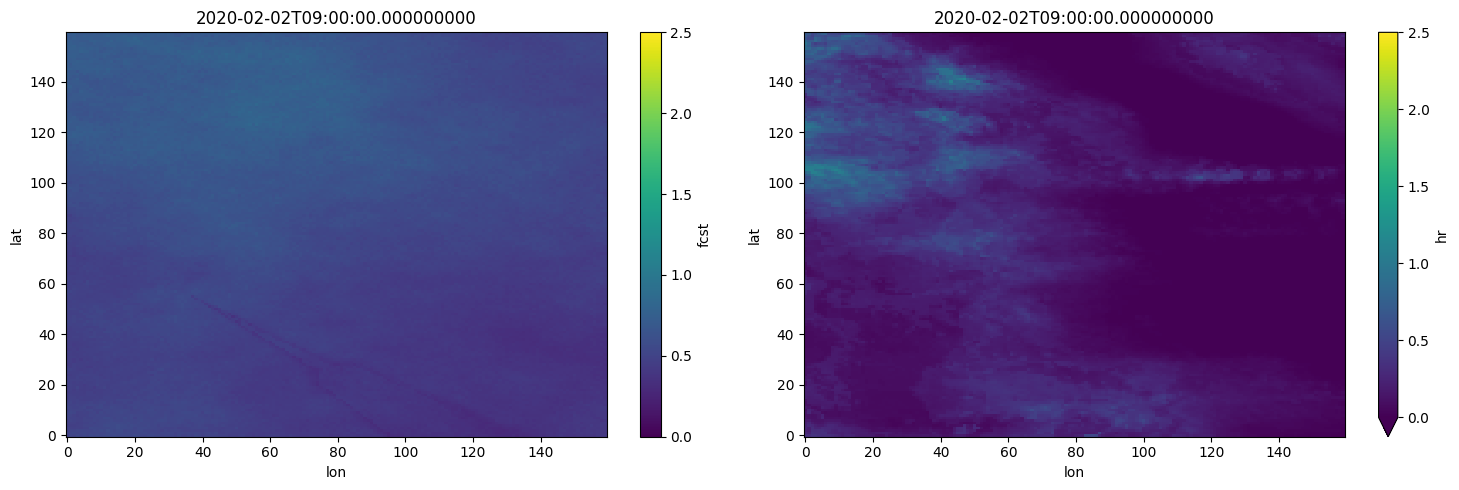

In [3]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex3/prcp_downs_unet_year_2020.nc")


plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 100
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


dn["fcst"].isel(time=time_index,).plot(ax=axes[0], vmin=0, vmax=2.5)
axes[0].set_title(f'{dn["time"].values[time_index]}')


dn["hr"].isel(time=time_index,).plot(ax=axes[1], vmin=0, vmax=2.5)
axes[1].set_title(f'{dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

In [8]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/deviation_correction/ex4/prcp_downs_unet_year_2020.nc")


plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 100
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


dn["fcst"].isel(time=time_index,).plot(ax=axes[0], vmin=0, vmax=2.5)
axes[0].set_title(f'{dn["time"].values[time_index]}')


dn["hr"].isel(time=time_index,).plot(ax=axes[1], vmin=0, vmax=2.5)
axes[1].set_title(f'{dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()

<xarray.Dataset>
Dimensions:    (time: 6768, lat_in: 16, lon_in: 16, lat: 160, lon: 160,
                pitch_idx: 6768)
Coordinates:
  * time       (time) datetime64[ns] 2020-02-01T06:00:00 ... 2020-12-01T01:00:00
  * pitch_idx  (pitch_idx) int64 0 1 2 3 4 5 6 ... 6762 6763 6764 6765 6766 6767
Dimensions without coordinates: lat_in, lon_in, lat, lon
Data variables:
    inputs     (time, lat_in, lon_in) float32 ...
    fcst       (time, lat, lon) float32 ...
    hr         (time, lat, lon) float32 ...
    lats       (time, lat) float32 ...
    lons       (time, lon) float32 ...
    tops       (time, lat, lon) float32 ...
Attributes:
    description:  Precipitation downscaling data.

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
dn =  xr.open_dataset("/cpfs01/projects-HDD/cfff-4a8d9af84f66_HDD/public/ShiXiSheng/yzy/downscaling_precipitation/precip_dataset_new/train/preproc_ifs_radklim_2016-06.nc")
cp = dn["cp_in"].diff(dim="time") * 1000
lsp = dn["lsp_in"].diff(dim="time") *1000

dn = dn.assign(tp=cp+lsp)

plt.figure(figsize=(15, 5))

import matplotlib.pyplot as plt
time_index = 30
# 创建一个 1 行 3 列的子图布局
fig, axes = plt.subplots(1, 2, figsize=(15, 5))


dn["tp"].isel(time=time_index,).sel(lon = slice(7,10),lat = slice(50,52)).plot(ax=axes[0], vmin=0, vmax=2.5)
axes[0].set_title(f'{dn["time"].values[time_index]}')


dn["yw_hourly_tar"].isel(time=time_index,).sel(lon_tar = slice(7,10),lat_tar = slice(50,52)).plot(ax=axes[1], vmin=0, vmax=2.5)
axes[1].set_title(f'{dn["time"].values[time_index]}')

# 调整布局以避免子图重叠
plt.tight_layout()

# 显示图形
plt.show()
# 俩张input 和 sr图
# 三张Input sr pred
# rmse
# fss图
# 代码上传过去github
# 报告的时候写好word
# 